---
---
---
# CSC8635 projects : Ehsan Honarbakhsh

---
---
## Dataset 1: Classification


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score ,jaccard_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans 

# Data understanding and preprocessing
The first part of the coursework focuses on a classification problem. Before proceeding, it is essential to gain a better understanding of the data.


In [4]:
data_fars=pd.read_csv('fars.csv')
data_fars.head(5)

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury


The dataset comprises 29 features, including 5 continuous and 24 categorical variables, along with a class variable named 'INJURY_SEVERITY.'

In [5]:
print('The shape of the dataset :' ,data_fars.shape)

The shape of the dataset : (100968, 30)


First, the data types of the features and the presence of missing values are examined. As observed, there appear to be no missing values in the dataset. However, 'Unknown' values must be considered as they could impact the analysis.

In [6]:
print(data_fars.isnull().sum())

CASE_STATE                             0
AGE                                    0
SEX                                    0
PERSON_TYPE                            0
SEATING_POSITION                       0
RESTRAINT_SYSTEM-USE                   0
AIR_BAG_AVAILABILITY/DEPLOYMENT        0
EJECTION                               0
EJECTION_PATH                          0
EXTRICATION                            0
NON_MOTORIST_LOCATION                  0
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0
METHOD_ALCOHOL_DETERMINATION           0
ALCOHOL_TEST_TYPE                      0
ALCOHOL_TEST_RESULT                    0
POLICE-REPORTED_DRUG_INVOLVEMENT       0
METHOD_OF_DRUG_DETERMINATION           0
DRUG_TEST_TYPE_(1_of_3)                0
DRUG_TEST_RESULTS_(1_of_3)             0
DRUG_TEST_TYPE_(2_of_3)                0
DRUG_TEST_RESULTS_(2_of_3)             0
DRUG_TEST_TYPE_(3_of_3)                0
DRUG_TEST_RESULTS_(3_of_3)             0
HISPANIC_ORIGIN                        0
TAKEN_TO_HOSPITA

In [7]:
data_fars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   CASE_STATE                           100968 non-null  object
 1   AGE                                  100968 non-null  int64 
 2   SEX                                  100968 non-null  object
 3   PERSON_TYPE                          100968 non-null  object
 4   SEATING_POSITION                     100968 non-null  object
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  object
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  object
 7   EJECTION                             100968 non-null  object
 8   EJECTION_PATH                        100968 non-null  object
 9   EXTRICATION                          100968 non-null  object
 10  NON_MOTORIST_LOCATION                100968 non-null  object
 11  POLICE_REPORTED_ALCOHOL_IN

To address the 'Unknown' values within the dataset, they first need to be converted into pandas' missing value format and subsequently into NumPy's missing value format to be properly handled by scikit-learn's imputer. Then, the SimpleImputer will be used to replace these 'Unknown' values with the most frequent value in each respective field, as all the features with missing values are categorical.

In [8]:
data_fars.replace(["Unknown"], pd.NA, inplace=True)
print(data_fars.isnull().sum())

CASE_STATE                                 0
AGE                                        0
SEX                                     1655
PERSON_TYPE                                0
SEATING_POSITION                        1768
RESTRAINT_SYSTEM-USE                    9017
AIR_BAG_AVAILABILITY/DEPLOYMENT            0
EJECTION                                 892
EJECTION_PATH                          10007
EXTRICATION                             1209
NON_MOTORIST_LOCATION                     61
POLICE_REPORTED_ALCOHOL_INVOLVEMENT        0
METHOD_ALCOHOL_DETERMINATION               0
ALCOHOL_TEST_TYPE                          0
ALCOHOL_TEST_RESULT                        0
POLICE-REPORTED_DRUG_INVOLVEMENT           0
METHOD_OF_DRUG_DETERMINATION               0
DRUG_TEST_TYPE_(1_of_3)                    0
DRUG_TEST_RESULTS_(1_of_3)                 0
DRUG_TEST_TYPE_(2_of_3)                    0
DRUG_TEST_RESULTS_(2_of_3)                 0
DRUG_TEST_TYPE_(3_of_3)                    0
DRUG_TEST_

In [9]:
data_fars = data_fars.replace({pd.NA: np.nan})

#Impute missing values with most frequent values as they are categorical
imputer = SimpleImputer(strategy='most_frequent')
data_fars = pd.DataFrame(imputer.fit_transform(data_fars), columns=data_fars.columns)

After addressing the missing values, the class variable should be assessed. As observed, the distribution of samples across each class is imbalanced, which could introduce bias during the training of classifiers. This imbalance needs to be addressed appropriately.

INJURY_SEVERITY
Fatal_Injury                      43017
No_Injury                         20007
Incapaciting_Injury               15072
Nonincapaciting_Evident_Injury    13890
Possible_Injury                    8674
Injured_Severity_Unknown            299
Died_Prior_to_Accident                9
Name: count, dtype: int64

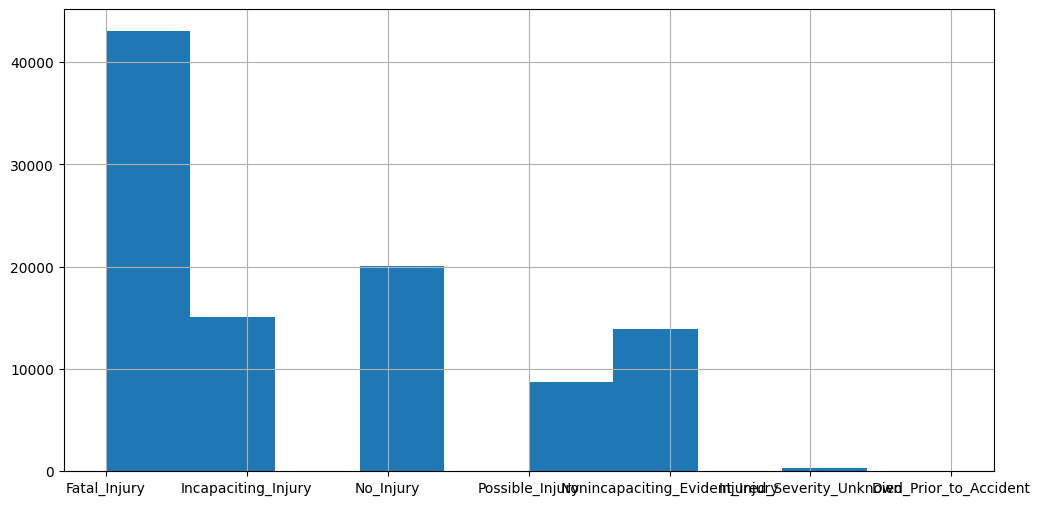

In [10]:
data_fars['INJURY_SEVERITY'].hist(figsize=(12,6))
data_fars['INJURY_SEVERITY'].value_counts()

The variable 'CASE_STATE,' which represents the state where the accident occurred, appears to be not useful and can therefore be removed from the dataset.



In [11]:
data_fars=data_fars.drop(columns='CASE_STATE')
data_fars.head()

,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,NON_MOTORIST_LOCATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,Not_Applicable_-_Vehicle_Occupant,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,Not_Applicable_-_Vehicle_Occupant,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,Not_Applicable_-_Vehicle_Occupant,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,Not_Applicable_-_Vehicle_Occupant,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,Not_Applicable_-_Vehicle_Occupant,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury


## Data Encoding :
Since most machine learning algorithms perform better with numerical values, the categorical features within the dataset need to be encoded into a numerical representation. There are several methods for achieving this, but label encoding is an appropriate choice as it does not add extra columns to the dataset during encoding, which helps avoid increasing the dataset's size.

In [12]:
#Separating categorical features' names
label_encoding_columns=data_fars.columns.drop(['AGE','ALCOHOL_TEST_RESULT','DRUG_TEST_RESULTS_(1_of_3)','DRUG_TEST_RESULTS_(2_of_3)','DRUG_TEST_RESULTS_(3_of_3)'])

encoder = LabelEncoder()
for column in label_encoding_columns:
    data_fars[column]=encoder.fit_transform(data_fars[column])
    
data_fars.head()

,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,NON_MOTORIST_LOCATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,34,1,1,3,7,2,2,0,1,16,...,0,2,0,5,0,27,29,19,16,1
1,20,1,1,3,7,9,2,0,1,16,...,0,2,0,5,0,27,29,19,16,1
2,43,1,1,3,5,4,0,0,0,16,...,0,2,0,5,0,27,29,19,4,1
3,38,0,6,6,5,4,0,0,0,16,...,0,2,0,6,1,27,29,19,11,2
4,50,1,1,3,5,9,0,0,1,16,...,0,2,0,5,1,27,29,19,4,1


Splitting predictors from the class variable.

In [13]:
feature_columns=data_fars.columns[:(len(data_fars.columns)-1)]
data_fars[feature_columns]

,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,NON_MOTORIST_LOCATION,...,DRUG_TEST_TYPE_(2_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE
0,34,1,1,3,7,2,2,0,1,16,...,2,0,2,0,5,0,27,29,19,16
1,20,1,1,3,7,9,2,0,1,16,...,2,0,2,0,5,0,27,29,19,16
2,43,1,1,3,5,4,0,0,0,16,...,2,0,2,0,5,0,27,29,19,4
3,38,0,6,6,5,4,0,0,0,16,...,2,0,2,0,6,1,27,29,19,11
4,50,1,1,3,5,9,0,0,1,16,...,2,0,2,0,5,1,27,29,19,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100963,10,0,6,13,5,4,0,0,1,16,...,2,0,2,0,6,1,27,29,19,11
100964,9,0,6,16,5,4,0,0,1,16,...,2,0,2,0,6,1,27,29,19,11
100965,7,0,6,14,4,4,0,0,1,16,...,2,0,2,0,6,1,27,29,19,11
100966,4,0,6,14,4,4,0,0,1,16,...,2,0,2,0,6,1,27,29,19,11


In [14]:
data_fars_features=data_fars[feature_columns]
data_fars_target=data_fars['INJURY_SEVERITY']

## Data Transformation:
Since most machine learning algorithms are sensitive to differences in the scales of features, the features need to be normalized before being fed into a classifier. In this case, the StandardScaler will be used to normalize the values, ensuring they have a mean of 0 and a standard deviation of 1.

In [15]:
standardscaler=preprocessing.StandardScaler()

## Sample Reduction: K-means For clustering:
Since the dataset contains approximately 101,000 samples, it is beneficial to reduce the number of samples by grouping them into clusters where similar samples are grouped together, and each cluster is distinct from the others. To achieve this, the K-means clustering algorithm will be utilized.

Before applying K-means, it is crucial to determine the optimal number of clusters. This will be done by performing K-means within a specified range (k = 1 to k = 20) and employing the elbow method. The elbow method evaluates how the addition of more clusters (increasing k) impacts the variance within clusters, helping to identify the optimal number of clusters.
Since K-means measures the distance between each data point and the centroids, it is crucial to normalize the feature values to prevent bias in the clustering results.

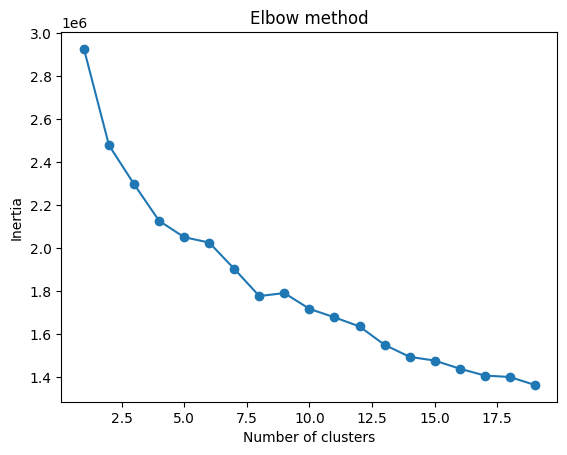

In [16]:
inertias = []
#Normalizing the dataset before being fed to k-means
data_kmeans=standardscaler.fit_transform(data_fars)
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,random_state=4)
    kmeans.fit(data_kmeans)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,20), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

As observed from the graph, selecting 6 clusters appears to be an appropriate choice. In the next step, K-means will be applied with the number of clusters set to 6. Subsequently, a new column will be added to the dataset to represent the corresponding cluster assigned to each sample.

In [17]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=4)
data_fars['cluster'] = kmeans.fit_predict(data_kmeans)
data_fars.head()

,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,NON_MOTORIST_LOCATION,...,DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY,cluster
0,34,1,1,3,7,2,2,0,1,16,...,2,0,5,0,27,29,19,16,1,5
1,20,1,1,3,7,9,2,0,1,16,...,2,0,5,0,27,29,19,16,1,4
2,43,1,1,3,5,4,0,0,0,16,...,2,0,5,0,27,29,19,4,1,3
3,38,0,6,6,5,4,0,0,0,16,...,2,0,6,1,27,29,19,11,2,3
4,50,1,1,3,5,9,0,0,1,16,...,2,0,5,1,27,29,19,4,1,5


#### Examining the distribution of samples within each cluster is valuable.
As observed, clusters 4, 1, and 5 contain a higher number of samples compared to the other clusters.

In [18]:
data_fars['cluster'].value_counts()

cluster
5    25502
4    21542
2    21437
0    14685
1     9355
3     8447
Name: count, dtype: int64

### Optimal Hyperparameters:
Since each classifier has a different set of hyperparameters, properly tuning these parameters can significantly impact the accuracy and performance of the model. Therefore, it is crucial to determine their optimal values.

To achieve this, Grid Search is employed for several reasons. A dictionary containing the possible range of values for each classifier's hyperparameters is defined, and these, along with their corresponding classifiers, are passed to the Grid Search function. This function evaluates the classifiers using all combinations of the specified values and identifies the most optimal ones.

Another advantage of using Grid Search is that it inherently performs cross-validation, controlled by the cv parameter, which specifies the number of folds for (Stratified) K-Fold cross-validation. This ensures that the imbalanced distribution of samples across classes does not adversely affect the model's performance.

### Classifiers Evaluation:
The performance and accuracy of each classifier are assessed based on its ability to correctly assign new samples to the appropriate class. To achieve this, several evaluation metrics are used. Specifically, the F1 score, precision, recall, and Jaccard score are calculated to provide a comprehensive understanding of each classifier's performance.


---
# Pipeline 1:
### Using Support Vector Machines (SVM) for Predicting the INJURY_SEVERITY Class
Support Vector Machines (SVM) are employed to predict the INJURY_SEVERITY class based on the features in the dataset. The SVM classifier finds the optimal hyperplane that best separates the classes in a high-dimensional feature space, making it a powerful tool for classification tasks.

Performing SVR on the entire dataset, which contains nearly 101,000 samples, is computationally expensive. To address this, SVM will be applied to each cluster individually, and the model's accuracy will be evaluated for each cluster. This approach not only reduces computational costs but also helps identify the samples that are most influential in predicting class labels. These samples can then be analyzed in-depth to determine the most critical features for improving classification accuracy.
### Splitting data into train and test sets:
To train a classifier, the dataset needs to be split into training and testing sets. This can be achieved using the train_test_split method. However, as mentioned earlier, the distribution of samples across classes is imbalanced. One way to address this issue is by utilizing a hyperparameter available in most classifiers called class_weight, which should be set to 'balanced' to account for this imbalance.In imbalanced datasets, classifiers tend to be biased toward the majority class because it dominates the data. The class_weight parameter adjusts the loss function to penalize misclassifications of minority classes more heavily than those of majority classes.

Since SVM is sensitive to the scale of features, the dataset must be normalized before being input into the SVM classifier. Additionally, a grid search will be conducted to determine the optimal hyperparameter values for the SVM model.

In [19]:
# creating subsets of dataset 
data_fars_cluster_full=data_fars[data_fars['cluster']==5]# Clusetr number 0,1,2,3,4,5 have been used
data_fars_cluster_features=data_fars_cluster_full[feature_columns]
data_fars_cluster_target=data_fars_cluster_full['INJURY_SEVERITY']
# Splitting train and test sets
x_train, x_test, y_train, y_test = train_test_split( data_fars_cluster_features, data_fars_cluster_target, test_size=0.3, random_state=4,shuffle=True)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (17851, 28) (17851,)
Test set: (7651, 28) (7651,)


In [20]:
x_train_scaled=standardscaler.fit_transform(np.asanyarray(x_train))
x_test_scaled=standardscaler.fit_transform(np.asanyarray(x_test))

In [ ]:
classifier_svm = svm.SVC(class_weight='balanced')
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1.0, 1.5,2.0], 
    'gamma': ['scale', 'auto']
}
# Grid search
grid_search = GridSearchCV(estimator=classifier_svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#Standardizing the data before feeding it to the grid search as it is a requirement for SVR
grid_search.fit(x_train_scaled,y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [21]:
classifier_svm = svm.SVC(kernel='rbf',C=2.0,class_weight='balanced',gamma='scale',random_state=4)
classifier_svm.fit(x_train_scaled, y_train) 

svm_prediction = classifier_svm.predict(x_test_scaled)

print("The F1 Score of the SVM classifier       :" ,f1_score(y_test, svm_prediction, average='weighted') )
print("The Precision Score of the SVM classifier:" ,precision_score(y_test, svm_prediction, average='weighted'))
print("The Recall of the SVM classifier         :" ,recall_score(y_test, svm_prediction, average='weighted') )
print("The Jaccard score of the SVM classifier  :" , jaccard_score(y_test, svm_prediction,average='weighted'))


The F1 Score of the SVM classifier       : 0.7982233588231527
The Precision Score of the SVM classifier: 0.8754115725523786
The Recall of the SVM classifier         : 0.7583322441510914
The Jaccard score of the SVM classifier  : 0.6944631196767498


/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The plot below shows and compares the accuracy of the SVM classifier across different methods and clusters. As observed, clusters 1,3, and 5 exhibit higher accuracy.
It can be observed that the accuracy of clusters with fewer samples is relatively higher than that of larger clusters. However, these clusters may not be suitable for further examination, as their small sample sizes can introduce bias toward certain classes. Additionally, this may lead to higher in-sample accuracy but lower out-of-sample accuracy due to the risk of bias and overfitting.

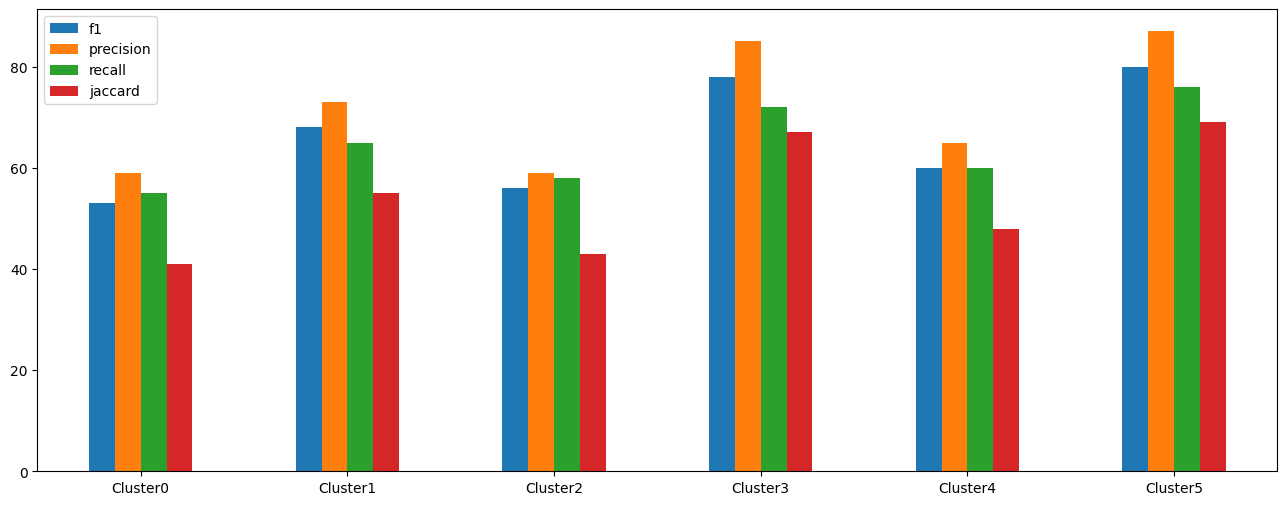

In [27]:
f1 = [53,68,56,78,60,80]
precision = [59,73,59,85,65,87]
recall=[55,65,58,72,60,76]
jaccard=[41,55,43,67,48,69]
index = ['Cluster0','Cluster1','Cluster2','Cluster3','Cluster4','Cluster5']
df = pd.DataFrame({'f1': f1,
                   'precision': precision,'recall':recall,'jaccard':jaccard}, index=index)
ax = df.plot.bar(rot=0,figsize=(16, 6))

---
# Pipeline 2:
### Using Random Forest Classifier for Predicting the INJURY_SEVERITY Class and Identifying the Most Important Features
In the second pipeline, a tree-based method is chosen to predict the INJURY_SEVERITY class based on the features in the dataset.In addition to making predictions, Random Forest also helps identify the most important features by evaluating their contribution to the model's performance, providing valuable insights for further analysis and feature selection. The Random Forest classifier will be applied to each cluster separately. Based on the accuracy of each cluster, the most accurate and relatively larger cluster will be selected for feature importance analysis. This will help reduce the number of features in the dataset while retaining the model's accuracy.

In [23]:
data_fars_cluster_full=data_fars[data_fars['cluster']==5]
data_fars_cluster_features=data_fars_cluster_full[feature_columns]
data_fars_cluster_target=data_fars_cluster_full['INJURY_SEVERITY']
# Splitting train and test sets
x_train, x_test, y_train, y_test = train_test_split( data_fars_cluster_features, data_fars_cluster_target, test_size=0.3, random_state=4,shuffle=True)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (17851, 28) (17851,)
Test set: (7651, 28) (7651,)


Since Random Forest is a tree-based algorithm, it is not sensitive to the scale of the features, so normalization is not required. Additionally, to address class imbalance, the 'class_weight' parameter of the algorithm will be set to 'balanced'.



In [ ]:
randomforest_model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Grid search
grid_search = GridSearchCV(estimator=randomforest_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(data_fars_cluster_features, data_fars_cluster_target)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [24]:
randomforest_model = RandomForestClassifier(n_estimators=100,max_depth=10 ,min_samples_split=5,min_samples_leaf=2,random_state=4,class_weight='balanced')
randomforest_model.fit(x_train, y_train)
randomforest_prediction = randomforest_model.predict(x_test)

print("The F1 Score of Random Forest classifier       :" ,f1_score(y_test,randomforest_prediction, average='weighted') )
print("The Precision Score of Random Forest classifier:" ,precision_score(y_test, randomforest_prediction, average='weighted'))
print("The Recall of Random Forest classifier         :" ,recall_score(y_test, randomforest_prediction, average='weighted') )
print("The Jaccard score of Random Forest classifier  :" ,jaccard_score(y_test, randomforest_prediction,average='weighted'))

The F1 Score of Random Forest classifier       : 0.8040653525687953
The Precision Score of Random Forest classifier: 0.8793098389316031
The Recall of Random Forest classifier         : 0.7702261142334336
The Jaccard score of Random Forest classifier  : 0.7022000741706308


Based on the bar chart below, cluster number 5 appears to be an appropriate choice for identifying important features, as it exhibits high accuracy and a larger number of samples.

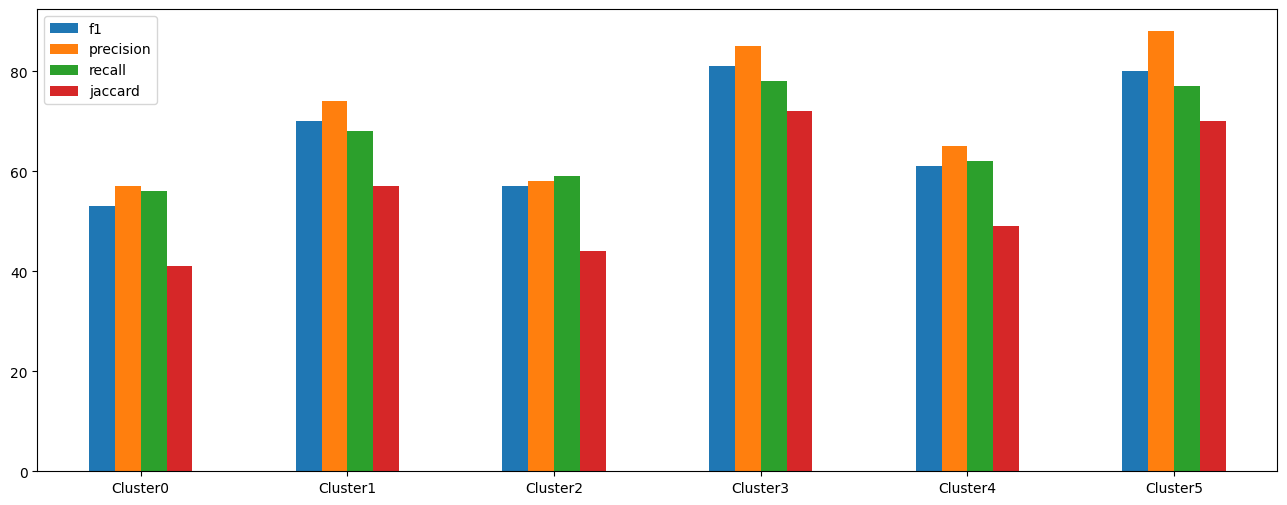

In [26]:
f1 = [53,70,57,81,61,80]
precision = [57,74,58,85,65,88]
recall=[56,68,59,78,62,77]
jaccard=[41,57,44,72,49,70]
index = ['Cluster0','Cluster1','Cluster2','Cluster3','Cluster4','Cluster5']
df = pd.DataFrame({'f1': f1,
                   'precision': precision,'recall':recall,'jaccard':jaccard}, index=index)
ax = df.plot.bar(rot=0,figsize=(16, 6))

## Finding the most important features using random forest output

In [28]:
important_features = randomforest_model.feature_importances_
feature_names = data_fars_features.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': important_features
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                                Feature  Importance
23                    TAKEN_TO_HOSPITAL    0.183522
0                                   AGE    0.179285
22                      HISPANIC_ORIGIN    0.096998
13                  ALCOHOL_TEST_RESULT    0.059278
27                                 RACE    0.052303
5       AIR_BAG_AVAILABILITY/DEPLOYMENT    0.052079
10  POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0.042711
21           DRUG_TEST_RESULTS_(3_of_3)    0.033388
17           DRUG_TEST_RESULTS_(1_of_3)    0.032492
20              DRUG_TEST_TYPE_(3_of_3)    0.032308
6                              EJECTION    0.024809
14     POLICE-REPORTED_DRUG_INVOLVEMENT    0.024032
4                  RESTRAINT_SYSTEM-USE    0.023108
18              DRUG_TEST_TYPE_(2_of_3)    0.022797
2                           PERSON_TYPE    0.022088
16              DRUG_TEST_TYPE_(1_of_3)    0.021948
19           DRUG_TEST_RESULTS_(2_of_3)    0.020856
3                      SEATING_POSITION    0.019360
11         M

In this step, the 15 most important features are selected to reduce dimension the dataset and evaluate the accuracy of the SVM in the first pipeline and the Random Forest classifier again. This is done to ensure that the models maintain the same or higher accuracy. Based on the results, a decision will be made whether to proceed with training the models in the subsequent pipelines using these features.

In [29]:
feature_reduced_important=importance_df['Feature'][:15]
data_fars_cluster_full=data_fars[data_fars['cluster']==5]
data_fars_cluster_features=data_fars_cluster_full[feature_reduced_important]
data_fars_cluster_target=data_fars_cluster_full['INJURY_SEVERITY']
# Splitting train and test sets
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced= train_test_split( data_fars_cluster_features, data_fars_cluster_target, test_size=0.3, random_state=4,shuffle=True)



## Training the Random Forest Classifier with the top 15 most important features
The Random Forest classifier is trained using the 15 most important features identified earlier. This approach aims to maintain or improve the model's accuracy while reducing the feature set, enhancing computational efficiency and interpretability.



In [30]:
randomforest_model_reduced = RandomForestClassifier(n_estimators=100,max_depth=10 ,min_samples_split=5,min_samples_leaf=2,random_state=4,class_weight='balanced')
randomforest_model_reduced.fit(x_train_reduced, y_train_reduced)
randomforest_reduced_prediction = randomforest_model_reduced.predict(x_test_reduced)

print("The F1 Score of Random Forest classifier       :" ,f1_score(y_test_reduced,randomforest_reduced_prediction, average='weighted') )
print("The Precision Score of Random Forest classifier:" ,precision_score(y_test_reduced, randomforest_reduced_prediction, average='weighted'))
print("The Recall of Random Forest classifier         :" ,recall_score(y_test_reduced, randomforest_reduced_prediction, average='weighted') )
print("The Jaccard score of Random Forest classifier  :" ,jaccard_score(y_test_reduced, randomforest_reduced_prediction,average='weighted'))

The F1 Score of Random Forest classifier       : 0.7990742235484305
The Precision Score of Random Forest classifier: 0.8775389641941072
The Recall of Random Forest classifier         : 0.7643445301267808
The Jaccard score of Random Forest classifier  : 0.6959841340143387


## Training the SVM Classifier with the Top 15 Most Important Features
The SVM classifier is trained using the 15 most important features identified earlier.

In [31]:
x_train_reduced_scaled=standardscaler.fit_transform(np.asanyarray(x_train_reduced))
x_test_reduced_scaled=standardscaler.fit_transform(np.asanyarray(x_test_reduced))

In [32]:
classifier_reduced_svm = svm.SVC(kernel='rbf',C=2.0,class_weight='balanced',gamma='scale',random_state=4)
classifier_reduced_svm.fit(x_train_reduced_scaled, y_train_reduced) 
svm_reduced_prediction = classifier_reduced_svm.predict(x_test_reduced_scaled)

print("The  accuracy (f1_score) of the SVM classifier:" ,f1_score(y_test_reduced, svm_reduced_prediction, average='weighted'))
print("The Precision Score of the SVM classifier     :" ,precision_score(y_test_reduced, svm_reduced_prediction, average='weighted'))
print("The Recall of the SVM classifier              :" ,recall_score(y_test_reduced, svm_reduced_prediction, average='weighted') )
print("The Jaccard score of the SVM classifier       :" ,jaccard_score(y_test_reduced, svm_reduced_prediction,average='weighted'))

The  accuracy (f1_score) of the SVM classifier: 0.7868196188353831
The Precision Score of the SVM classifier     : 0.8729289618649193
The Recall of the SVM classifier              : 0.7425173179976474
The Jaccard score of the SVM classifier       : 0.6796295052420741


/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


According to the results of both Random Forest and SVM, it can be seen that the classifiers achieved nearly the same accuracy  but with fewer features (15 features). Based on this evaluation, it can be concluded that the feature reduction was effective. Therefore, the following pipelines will be performed using the reduced feature dataset

---
# Pipeline 3:
### Using Logistic Regression Classifier for Predicting the INJURY_SEVERITY Class with a Reduced Features Dataset
The Logistic Regression classifier is employed to predict the INJURY_SEVERITY class based on the reduced feature set. This approach allows for efficient classification while maintaining or improving model performance by focusing on the most important features identified in earlier steps.

At its core, Logistic Regression is a classifier that predicts the probability of each sample belonging to a certain class. It is inherently designed for binary classification problems; however, by setting the hyperparameter 'multi_class' to 'multinomial', it can be adapted for multi-class problems. To mitigate the effects of class imbalance, the 'class_weight' parameter is set to 'balanced'.

In [ ]:
logisticregression_classifier= LogisticRegression()
param_grid = {
    'solver': ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
    'max_iter': [100,500,700,1000],
    'C':[0.5,1,2,3],
    'multi_class':['multinomial']
}
# Grid search
grid_search = GridSearchCV(estimator=logisticregression_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

data_fars_features_reduced=standardscaler.fit_transform(np.asanyarray(data_fars_cluster_features))

grid_search.fit(data_fars_features_reduced,data_fars_cluster_target)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [34]:
logisticregression_classifier= LogisticRegression(C=0.5, solver='newton-cg',multi_class='multinomial',max_iter=100,class_weight='balanced',random_state=4)
logisticregression_classifier.fit(x_train_reduced_scaled,y_train_reduced)
logisticregression_prediction =logisticregression_classifier.predict(x_test_reduced_scaled)

print("The F1 score Logistic Regression Classifier          :" ,f1_score(y_test_reduced, logisticregression_prediction, average='weighted') )
print("The Precision Score of Logistic Regression Classifier:" ,precision_score(y_test_reduced, logisticregression_prediction, average='weighted'))
print("The Recall of Logistic Regression Classifier         :" ,recall_score(y_test_reduced,logisticregression_prediction, average='weighted') )
print("The Jaccard score of Logistic Regression Classifier  :" , jaccard_score(y_test_reduced, logisticregression_prediction,average='weighted'))

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


The F1 score Logistic Regression Classifier          : 0.7578271556372844
The Precision Score of Logistic Regression Classifier: 0.8729845536715488
The Recall of Logistic Regression Classifier         : 0.7012155273820415
The Jaccard score of Logistic Regression Classifier  : 0.6378300628676046


/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


According to the results of the Logistic Regression classifier, the model achieved an accuracy of approximately 76% and a precision of nearly 87%. This indicates the percentage of instances where the classifier correctly predicted the class as its actual label.

---
# Pipeline 4:
### Using K-Nearest Neighbors (KNN) Classifier for Predicting the INJURY_SEVERITY Class with a Reduced Features Dataset

The KNN classifier predicts the class of a given data point based on its similarity to its nearest neighbors in the training dataset. Similarity is determined by measuring the distance between data points, which makes the scale of features critical to the model's performance. Therefore, the feature values must be normalized before being fed into the KNN classifier to ensure accurate and unbiased predictions.



In [ ]:
knn_classifier = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3,5,7,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree','kd_tree','brute','auto']
}
# Grid search
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

data_fars_features_reduced=standardscaler.fit_transform(np.asanyarray(data_fars_cluster_features))

grid_search.fit(data_fars_features_reduced,data_fars_cluster_target)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [38]:
knn_classifier = KNeighborsClassifier(n_neighbors =5,weights= 'uniform',algorithm='kd_tree',p=2,metric='minkowski')
knn_classifier.fit(x_train_reduced_scaled,y_train_reduced)
knn_prediction = knn_classifier.predict(x_test_reduced_scaled)

print("The F1 Score of the KNN Classifier       :" ,f1_score(y_test_reduced, knn_prediction, average='weighted') )
print("The Precision Score of the KNN Classifier:" ,precision_score(y_test_reduced, knn_prediction, average='weighted'))
print("The Recall of the KNN Classifier         :" ,recall_score(y_test_reduced,knn_prediction, average='weighted') )
print("The Jaccard score of the KNN Classifier  :" , jaccard_score(y_test_reduced, knn_prediction,average='weighted'))

The F1 Score of the KNN Classifier       : 0.832128337649262
The Precision Score of the KNN Classifier: 0.8236886155544199
The Recall of the KNN Classifier         : 0.8430270552868906
The Jaccard score of the KNN Classifier  : 0.7570044317755183


The KNN classifier achieved an accuracy of approximately 83% with a precision of 82%. This demonstrates the classifier's strong performance in predicting class labels for Injury Severity.

# Conclusion and Evaluation:
The bar plot below provides information about each classifier's performance based on the four metrics mentioned earlier. All classifiers were trained using samples from cluster number 5 and the 15 most important features identified through Random Forest feature importance (performed on cluster number 5).

According to the bar chart, SVM, Random Forest, and Logistic Regression exhibit higher accuracy in predicting the correct classes, as indicated by their precision values.



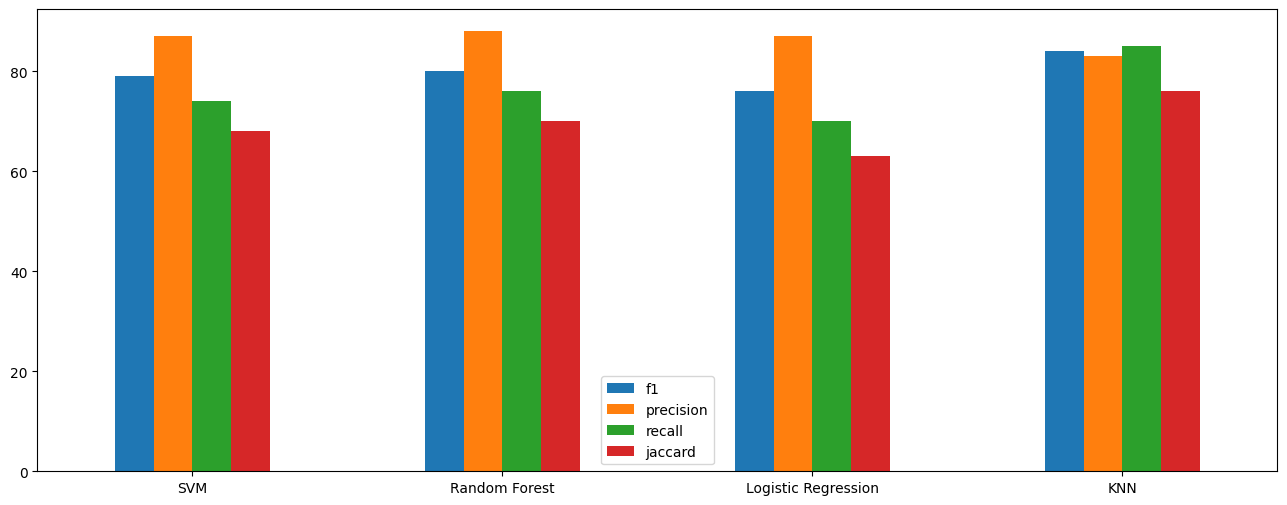

In [37]:
f1 = [79,80,76,84]
precision = [87,88,87,83]
recall=[74,76,70,85]
jaccard=[68,70,63,76]
index = ['SVM','Random Forest','Logistic Regression','KNN',]
df = pd.DataFrame({'f1': f1,
                   'precision': precision,'recall':recall,'jaccard':jaccard}, index=index)
ax = df.plot.bar(rot=0,figsize=(16, 6))

---
---
---
## Dataset 2: Regression

In [39]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Data understanding and Preprocessing:


The regression task in this course involves a dataset named 'fitting-results.csv'. This dataset includes five continuous variables and four target variables: 'a', 'mu', 'tau', and 'a0'.
After loading the dataset using the Pandas library and inspecting the first few rows, it becomes evident that the variables are expressed in different units. This disparity must be carefully considered in subsequent steps, particularly when selecting and training a machine learning model.



In [40]:
data_reg=pd.read_csv('fitting-results.csv')
data_reg.head()

,n_cyanos,co2,light,SucRatio,Nsample,a,mu,tau,a0
0,262,73.578860,0.367894,0.451505,13123,5.033993,5.483011,0.552466,1.0
1,610,74.582194,0.481606,0.969900,12474,1.018406,1.830727,0.156458,1.0
2,118,33.111037,0.625418,0.909699,8867,2.569159,3.330662,0.412541,1.0
3,159,8.027676,0.575251,0.137124,16494,1.837341,3.371570,0.260798,1.0
4,957,38.796599,0.939799,0.234114,10267,0.999268,2.059303,0.098619,1.0


The next step involves examining the dataset for any missing values. 

In [41]:
print(data_reg.isnull().sum())

n_cyanos    0
co2         0
light       0
SucRatio    0
Nsample     0
a           0
mu          0
tau         0
a0          0
dtype: int64


Since some values might be recorded as 'Unknown' instead of being explicitly marked as missing, it is essential to address this possibility. To ensure the dataset is free from missing values, any occurrence of 'Unknown' is converted to a Pandas missing value (NaN), after which the dataset is rechecked for completeness

In [42]:
data_reg.replace(["Unknown"], pd.NA, inplace=True)
data_reg.replace([" "], pd.NA, inplace=True)
data_reg.replace(["."], pd.NA, inplace=True)
data_reg.replace(["unknown"], pd.NA, inplace=True)
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n_cyanos  19992 non-null  int64  
 1   co2       19992 non-null  float64
 2   light     19992 non-null  float64
 3   SucRatio  19992 non-null  float64
 4   Nsample   19992 non-null  int64  
 5   a         19992 non-null  float64
 6   mu        19992 non-null  float64
 7   tau       19992 non-null  float64
 8   a0        19992 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


As mentioned earlier, the dataset contains variables with different units. Therefore, data transformation is crucial to standardize the values before feeding them into machine learning models. Two methods of data transformation are defined below; however, the Standard Scaler (which scales each value to have a mean of 0 and a standard deviation of 1) is applied in the pipeline. Upon evaluation, it has been observed that the Standard Scaler has a more positive impact on the model's performance.

In [43]:
#minmax_scaler=preprocessing.MinMaxScaler()
standard_scaler=preprocessing.StandardScaler()

## Evaluation Metrics

All regressor models across the pipelines are evaluated using two key metrics: Mean Absolute Error (MAE) and R-squared (R²). MAE calculates the average absolute difference between predicted values and actual values, providing an indication of prediction accuracy. R², on the other hand, measures how well the predicted values match the actual data, representing the proportion of variance in the dependent variable that is predictable from the independent variables.

---
# Pipeline 1 ('a') : 
## Predicting target varibale 'a' using SVR
To create a pipeline for predicting the target variable 'a', a subset of the dataset containing all predictor variables and the target variable 'a' must first be prepared.

In [44]:
#Creating the subbset required for prediction of 'a'
data_reg_a=data_reg[['n_cyanos','co2','light','SucRatio','Nsample','a']]
data_reg_a_features=data_reg_a[['n_cyanos','co2','light','SucRatio','Nsample']]
data_reg_a_target=data_reg_a[['a']]
data_reg_a.head()

,n_cyanos,co2,light,SucRatio,Nsample,a
0,262,73.578860,0.367894,0.451505,13123,5.033993
1,610,74.582194,0.481606,0.969900,12474,1.018406
2,118,33.111037,0.625418,0.909699,8867,2.569159
3,159,8.027676,0.575251,0.137124,16494,1.837341
4,957,38.796599,0.939799,0.234114,10267,0.999268


Once the subset is created, it is crucial to analyze the relationships between each predictor variable and the target variable 'a'. Scatter plots are particularly useful for visualizing these relationships. Upon examining the scatter plots, it becomes evident that the relationships between the predictors and 'a' are non-linear. This observation should be carefully considered when selecting an appropriate regressor for the pipeline.

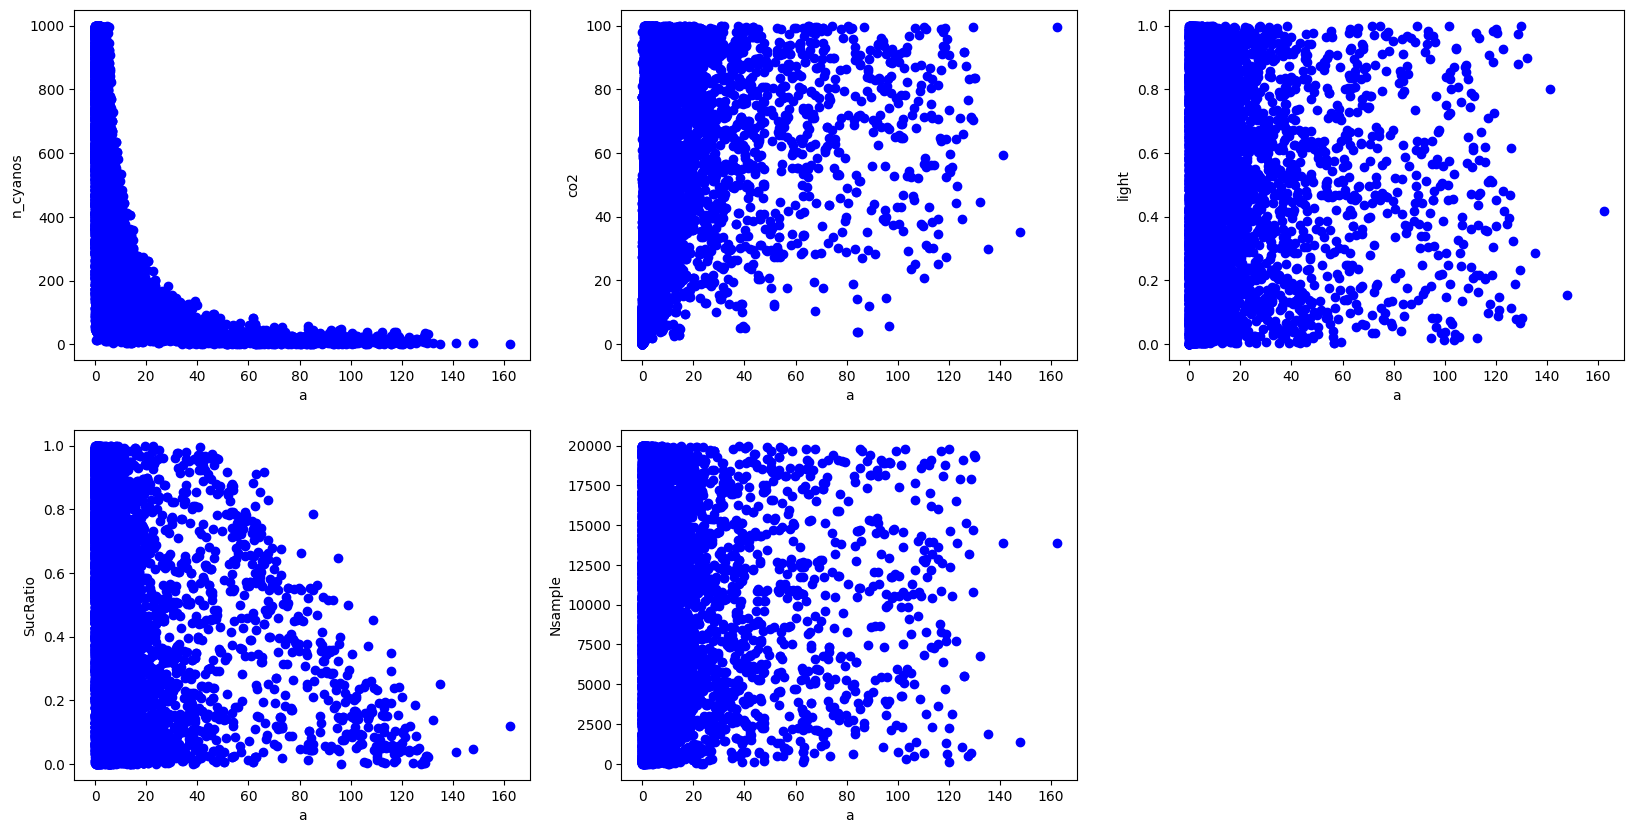

In [45]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
plt.scatter( data_reg_a.a,data_reg_a.n_cyanos,  color='blue')
plt.xlabel("a")
plt.ylabel("n_cyanos")
plt.subplot(2,3,2)
plt.scatter( data_reg_a.a, data_reg_a.co2, color='blue')
plt.xlabel("a")
plt.ylabel("co2")
plt.subplot(2,3,3)
plt.scatter( data_reg_a.a,data_reg_a.light,  color='blue')
plt.xlabel("a")
plt.ylabel("light")
plt.subplot(2,3,4)
plt.scatter( data_reg_a.a,data_reg_a.SucRatio,  color='blue')
plt.xlabel("a")
plt.ylabel("SucRatio")
plt.subplot(2,3,5)
plt.scatter( data_reg_a.a, data_reg_a.Nsample, color='blue')
plt.xlabel("a")
plt.ylabel("Nsample")
plt.show()

In the next step, the dataset needs to be split into training and test sets. The training set is used to train the model (and optionally evaluate its accuracy on the training data), while the test set is reserved for assessing the model's overall accuracy on unseen data.
After splitting the data into training and test sets, the Standard Scaler is applied to standardize both sets. This ensures that the data used in the machine learning pipelines is appropriately scaled for optimal model performance.

In [46]:
# Creating the training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_reg_a_features, data_reg_a_target, test_size=0.3, random_state=4,shuffle=True)
# Fitting standard scaler to standardize the training and test sets
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))

As demonstrated earlier, the relationship between the predictor variables and the target variable 'a' is non-linear. Therefore, a non-linear model is likely to be a suitable choice. Support Vector Regression (SVR), a variant of Support Vector Machines (SVM), is a machine learning algorithm designed to predict continuous numeric values. An SVM model will be defined and fitted to the dataset in subsequent steps.

In [47]:
svr_model_a = SVR()

SVR includes hyperparameters such as 'kernel', 'C', and 'epsilon'. The 'rbf' kernel is selected due to the non-linear nature of the relationship between the predictors and the target variable 'a'. To determine the optimal values for the remaining hyperparameters, a Grid Search is employed. Grid Search systematically evaluates the SVR model on the dataset using a predefined set of hyperparameter values and identifies the combination that yields the most accurate results.

In [ ]:
param_grid = {
    'C': [1.0, 1.5,2.0,2.5,3.0,3.5,4.0], 
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7]
}
# Grid search
grid_search = GridSearchCV(estimator=svr_model_a, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

#Standardizing the data before feeding it to the grid search as it is a requirement for SVR
data_reg_a_features_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_a_features))
data_reg_a_target_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_a_target))

grid_search.fit(data_reg_a_features_scaled, data_reg_a_target_scaled)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Now that the optimal hyperparameters for the SVM have been identified, the model is trained using these values and then fitted to the training set. 
The accuracy of the model is evaluated using R², which is an appropriate evaluation metric for regression problems. As indicated by the model's output, the SVR achieves an accuracy of approximately 75% in predicting the target variable 'a'.



In [48]:
np.random.seed(4)
svr_model_a = SVR(kernel="rbf",gamma='auto', C=4.0, epsilon=0.3)
svr_model_a.fit(x_train, y_train) 

predictions = svr_model_a.predict(x_test) 

mae_svr = mean_absolute_error(y_test,predictions)
r2_svr = r2_score(y_test,predictions)

print("SVR MAE Score: ",mae_svr)
print("SVR R2 Score : ",r2_svr)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR MAE Score:  0.22863590357079694
SVR R2 Score :  0.7573036995446804


---
# Pipeline 2 ('a'):
## Predicting variable 'a' using Random Forest Regressor

The non-linear nature of the relationship suggests that a rule-based learning model, such as Random Forest, could be an appropriate choice for the second pipeline to predict the target variable 'a'.
Random Forest is a tree-based algorithm that is not sensitive to the scale of the features. This is because it splits nodes based on the order of the data rather than the absolute values, meaning that features with different scales do not affect the model's performance. As a result, it is not necessary to normalize the datasets before feeding them into the Random Forest regressor.

In [49]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_a_features, data_reg_a_target, test_size=0.3, random_state=4,shuffle=True)

random_forest_regressor_model_a = RandomForestRegressor() 

In this step, Grid Search is used to identify the optimal values for the hyperparameters of the Random Forest Regressor.

In [ ]:
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3,4]
}
# Grid search
grid_search = GridSearchCV(estimator=random_forest_regressor_model_a, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(data_reg_a_features, data_reg_a_target)

# Best parameters
print("Best parameters:", grid_search.best_params_)

The random forest regressor was trained using the optimal hyperparameters and fitted to the training dataset.
As shown below, the model achieved an accuracy of 97% in predicting the target variable, demonstrating superior performance compared to the SVR model.

In [50]:
random_forest_regressor_model_a = RandomForestRegressor(n_estimators=250,max_depth=None,min_samples_leaf=1,min_samples_split=2, random_state=42) 
random_forest_regressor_model_a.fit(x_train,y_train)
predictions=random_forest_regressor_model_a.predict(x_test)


mae_randomforest = mean_absolute_error(y_test,predictions)
r2_randomforset=r2_score(y_test,predictions)

print("Random Forest Regressor MAE Score: ",mae_randomforest)
print("Random Forest Regressor R2 Score : ",r2_randomforset)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor MAE Score:  0.36132307033032635
Random Forest Regressor R2 Score :  0.978770348450361


## Feature Importance of Random Forest Regressor

The random forest model allows us to derive the importance of each feature, also known as Gini importance. Feature importance is calculated as the (normalized) total reduction in the criterion achieved by that feature .The bar chart shows the feature importance provided by random forest classifier.

In [51]:
# Feature importance
important_features = random_forest_regressor_model_a.feature_importances_
feature_names = data_reg_a_features.columns

#Using pandas to create a dataFrame 
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': important_features
}).sort_values(by='Importance', ascending=False)
print(importance_df)

    Feature  Importance
0  n_cyanos    0.687636
3  SucRatio    0.155843
1       co2    0.145979
2     light    0.005510
4   Nsample    0.005032


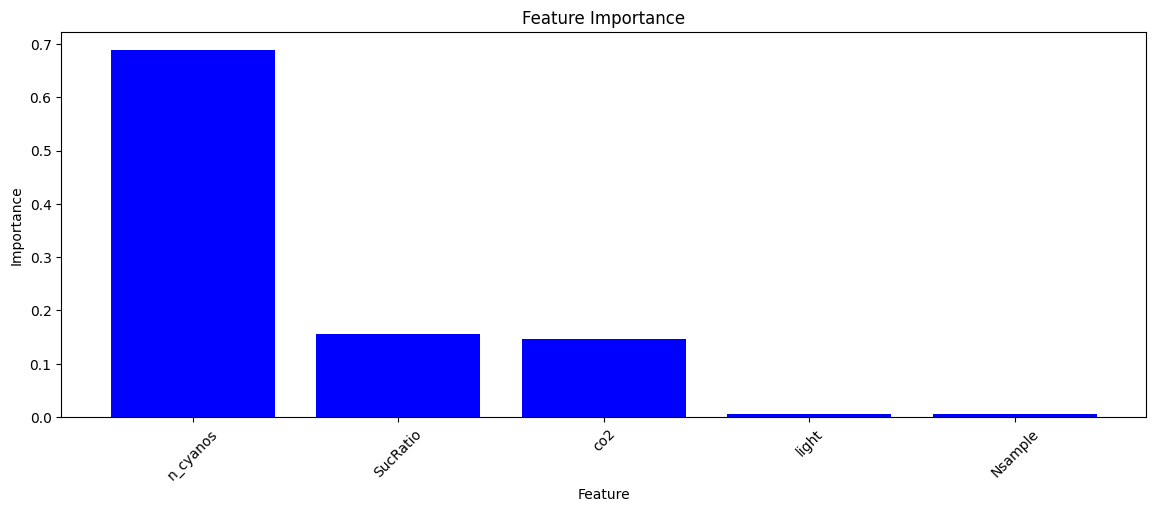

In [52]:
# Plot feature importances
plt.figure(figsize=(14, 5))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

To simplify the model and retain only the most important features for training, the top three features with the highest importance were selected. A subset of the dataset containing only these features was then created for comparison of model accuracy.

In [53]:
feature_reduced_important=importance_df['Feature'][:3]
data_reg_a_features_reduced =data_reg[feature_reduced_important]
data_reg_a_target_reduced=data_reg_a[['a']]

Next, perform classification using the SVR classifier and the Random Forest model on the newly reduced dataset, which contains the top three most important features.

In [54]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_a_features_reduced,data_reg_a_target_reduced, test_size=0.3, random_state=4,shuffle=True)
x_train_scaled_reduced=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train_scaled_reduced=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test_scaled_reduced=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test_scaled_reduced=standard_scaler.fit_transform(np.asanyarray(y_test))

In [55]:
np.random.seed(123)
svr_model_a.fit(x_train_scaled_reduced, y_train_scaled_reduced)  
svr_predictions_reduced = svr_model_a.predict(x_test_scaled_reduced)  

mae_svr_reduced = mean_absolute_error(y_test_scaled_reduced,svr_predictions_reduced) 
r2_svr_reduced= r2_score(y_test_scaled_reduced,svr_predictions_reduced)

print("SVR MAE Score: ",mae_svr_reduced)
print("SVR R2 Score : ",r2_svr_reduced)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR MAE Score:  0.2340842738864294
SVR R2 Score :  0.8242960668291446


### Performing Random Forest  with reduced dataset

In [56]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_a_features_reduced, data_reg_a_target_reduced, test_size=0.3, random_state=4,shuffle=True)

random_forest_regressor_model_a.fit(x_train,y_train)
predictions=random_forest_regressor_model_a.predict(x_test)

mae_randomforest = mean_absolute_error(y_test,predictions)
r2_randomforset=r2_score(y_test,predictions)
print("Random Forest Regressor MAE Score: ",mae_randomforest)
print("Random Forest Regressor R2 Score: ",r2_randomforset)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor MAE Score:  0.3342091316185816
Random Forest Regressor R2 Score:  0.9799679288147604


The results indicate that the prediction accuracy (R²) of the SVR model increased significantly with the reduced feature set, while the Random Forest model maintained similar accuracy. Based on these findings, it can be concluded that the features 'n_cyanos,' 'SucRatio,' and 'co2' play a critical role in predicting the target variable 'a'.

---
# Pipeline 3 ('a') :
## Predicting Variable 'a' Using K-Nearest Neighbors (KNN)

Since K-Nearest Neighbors (KNN) measures the distance between a data point and its neighboring points, it is essential to normalize the dataset before feeding it into the KNN regressor.

In [57]:
#Creating the subbset required for prediction of 'a'
data_reg_a=data_reg[['n_cyanos','co2','light','SucRatio','Nsample','a']]
data_reg_a_features=data_reg_a[['n_cyanos','co2','light','SucRatio','Nsample']]
data_reg_a_target=data_reg_a[['a']]

x_train, x_test, y_train, y_test = train_test_split(data_reg_a_features, data_reg_a_target, test_size=0.3, random_state=4,shuffle=True)

x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))


In [58]:
knn_regressor_a = KNeighborsRegressor()

In [59]:
param_grid = {
    'n_neighbors': [5,6,7,8,9,10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
# Grid search
grid_search = GridSearchCV(estimator=knn_regressor_a, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

data_reg_a_features_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_a_features))
data_reg_a_target_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_a_target))

grid_search.fit(data_reg_a_features, data_reg_a_target)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'algorithm': 'auto', 'n_neighbors': 5}


Based on the grid search results, the optimal hyperparameters for KNN regressor are 'auto' for the algorithm and 5 for the number of neighbors. The model is then trained using these parameters.

In [60]:
knn_regressor_a = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
knn_regressor_a.fit(x_train, y_train)

knn_prediction_a = knn_regressor_a.predict(x_test)

msa_KNN = mean_absolute_error(y_test, knn_prediction_a)
r2_KNN = r2_score(y_test, knn_prediction_a)
print("KNN MSE Score: ",msa_KNN)
print("KNN R2 Score: ",r2_KNN)

KNN MSE Score:  0.1568205607661142
KNN R2 Score:  0.6731346534307603


Next, perform and evaluate the KNN model on the reduced feature dataset, utilizing the top 3 features identified through the feature importance analysis from the Random Forest model.

In [61]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_a_features_reduced,data_reg_a_target_reduced, test_size=0.3, random_state=4,shuffle=True)
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))

In [62]:
knn_regressor_a.fit(x_train, y_train)
knn_prediction_a_reduced = knn_regressor_a.predict(x_test)

msa_KNN_reduced = mean_absolute_error(y_test, knn_prediction_a_reduced)
r2_KNN_reduced = r2_score(y_test, knn_prediction_a_reduced)

print("KNN MSE Score: ",msa_KNN_reduced)
print("KNN R2 Score: ",r2_KNN_reduced)

KNN MSE Score:  0.08881595842720977
KNN R2 Score:  0.8707601088590955


The results show that the prediction accuracy of the KNN regressor improved significantly(form 67% to 87%) when applied to the reduced dataset.

---
# Pipeline 4('a') :
## predicting varibale 'a' using Gradient Boosting

Since the relationship between the variables and the target variable 'a' is non-linear, Gradient Boosting is a suitable and powerful choice. It excels at capturing non-linear relationships between the target and features, while also being robust in handling missing values and outliers.

Gradient Boosting is a variant of ensemble methods, where multiple weak models are created and combined to achieve improved overall performance.

Since Gradient Boosting is a tree-based method, it splits the data based on feature thresholds, which are not affected by the scale of the data. Therefore, it is not necessary to normalize the datasets before feeding them into the model.



In [63]:
#Creating the subbset required for prediction of 'a'
data_reg_a=data_reg[['n_cyanos','co2','light','SucRatio','Nsample','a']]
data_reg_a_features=data_reg_a[['n_cyanos','co2','light','SucRatio','Nsample']]
data_reg_a_target=data_reg_a[['a']]

x_train, x_test, y_train, y_test = train_test_split(data_reg_a_features, data_reg_a_target, test_size=0.3, random_state=4,shuffle=True)


In [64]:
gradientboosting_regressor_a = GradientBoostingRegressor()

To optimize the hyperparameters of the Gradient Boosting model, grid search was used to determine the best values for n_estimators and learning_rate. From the output, the optimal values were found to be 150 and 0.2 for n_estimators and learning_rate, respectively.

In [ ]:
param_grid = {
    'n_estimators': [100,150,200,250,300],
    'learning_rate': [0.1,0.2,0.3,0.4]
}
# Grid search
grid_search = GridSearchCV(estimator=gradientboosting_regressor_a, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

grid_search.fit(data_reg_a_features, data_reg_a_target)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [65]:
gradientboosting_regressor_a = GradientBoostingRegressor(n_estimators=150, learning_rate=0.2,max_depth=1)
gradientboosting_regressor_a.fit(x_train, y_train)
gradientboosting_prediction =gradientboosting_regressor_a.predict(x_test)

mae_gradientboosting = mean_absolute_error(y_test, gradientboosting_prediction)
r2_gradientboosting = r2_score(y_test, gradientboosting_prediction)

print("Gradient Boosting Regressor MAE Score: ",mae_gradientboosting)
print("Gradient Boosting Regressor R2 Score : ",r2_gradientboosting)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Regressor MAE Score:  3.149611884601314
Gradient Boosting Regressor R2 Score :  0.7464541409672893


The model achieved an accuracy of approximately 75% in predicting the target variable 'a'. Next, the algorithm will be applied to a reduced feature dataset to compare its performance.

In [66]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_a_features_reduced,data_reg_a_target_reduced, test_size=0.3, random_state=4,shuffle=True)

In [67]:
gradientboosting_regressor_a.fit(x_train, y_train)
gradientboosting_prediction_reduced =gradientboosting_regressor_a.predict(x_test)

mae_gradientboosting_reduced = mean_absolute_error(y_test, gradientboosting_prediction_reduced)
r2_gradientboosting_reduced = r2_score(y_test, gradientboosting_prediction_reduced)

print("Gradient Boosting Regressor MAE Score: ",mae_gradientboosting_reduced)
print("Gradient Boosting Regressor R2 Score : ",r2_gradientboosting_reduced)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Regressor MAE Score:  3.150810466156955
Gradient Boosting Regressor R2 Score :  0.7465995908194293


An assessment of the model's output on the reduced feature dataset reveals that reducing the features did not improve the model's accuracy.

The bar chart below illustrates the performance of four different pipelines in predicting the target variable 'a' using both the complete dataset and the reduced feature dataset.


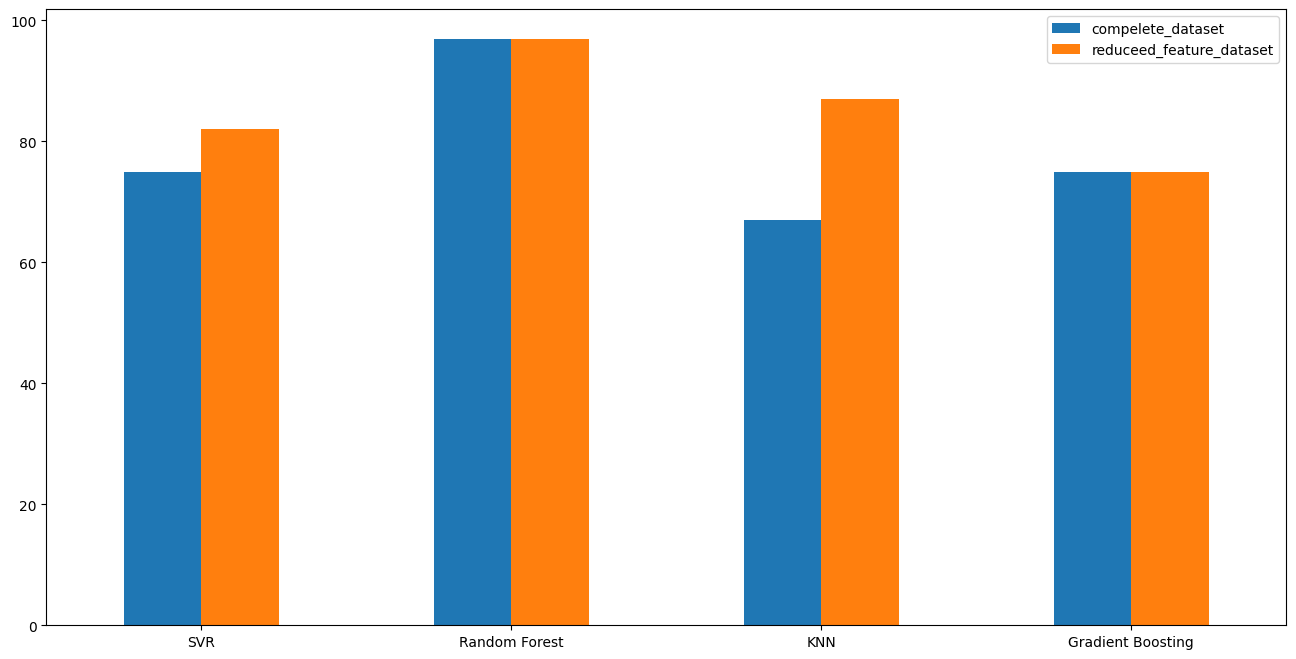

In [68]:
compelete_dataset = [75,97,67,75]
reduceed_feature_dataset = [82,97,87,75]
index = ['SVR', 'Random Forest', 'KNN', 'Gradient Boosting']
df = pd.DataFrame({'compelete_dataset': compelete_dataset,
                   'reduceed_feature_dataset': reduceed_feature_dataset}, index=index)
ax = df.plot.bar(rot=0,figsize=(16, 8))

---
---
# Pipeline 1 ('mu') :
## Predicting variable 'mu' using SVR

To select the best pipeline for predicting the target variable 'mu,' it is essential to analyze its relationship with the predictors. As evident from the scatter plots below, there is a non-linear relationship between the target variable 'mu' and the predictors.

Therefore, Support Vector Regression (SVR) is a suitable choice for this pipeline to predict 'mu.'

In [69]:
#Creating the subbset required for prediction of 'mu'
data_reg_mu=data_reg[['n_cyanos','co2','light','SucRatio','Nsample','mu']]
data_reg_mu_features=data_reg_mu[['n_cyanos','co2','light','SucRatio','Nsample']]
data_reg_mu_target=data_reg_mu[['mu']]

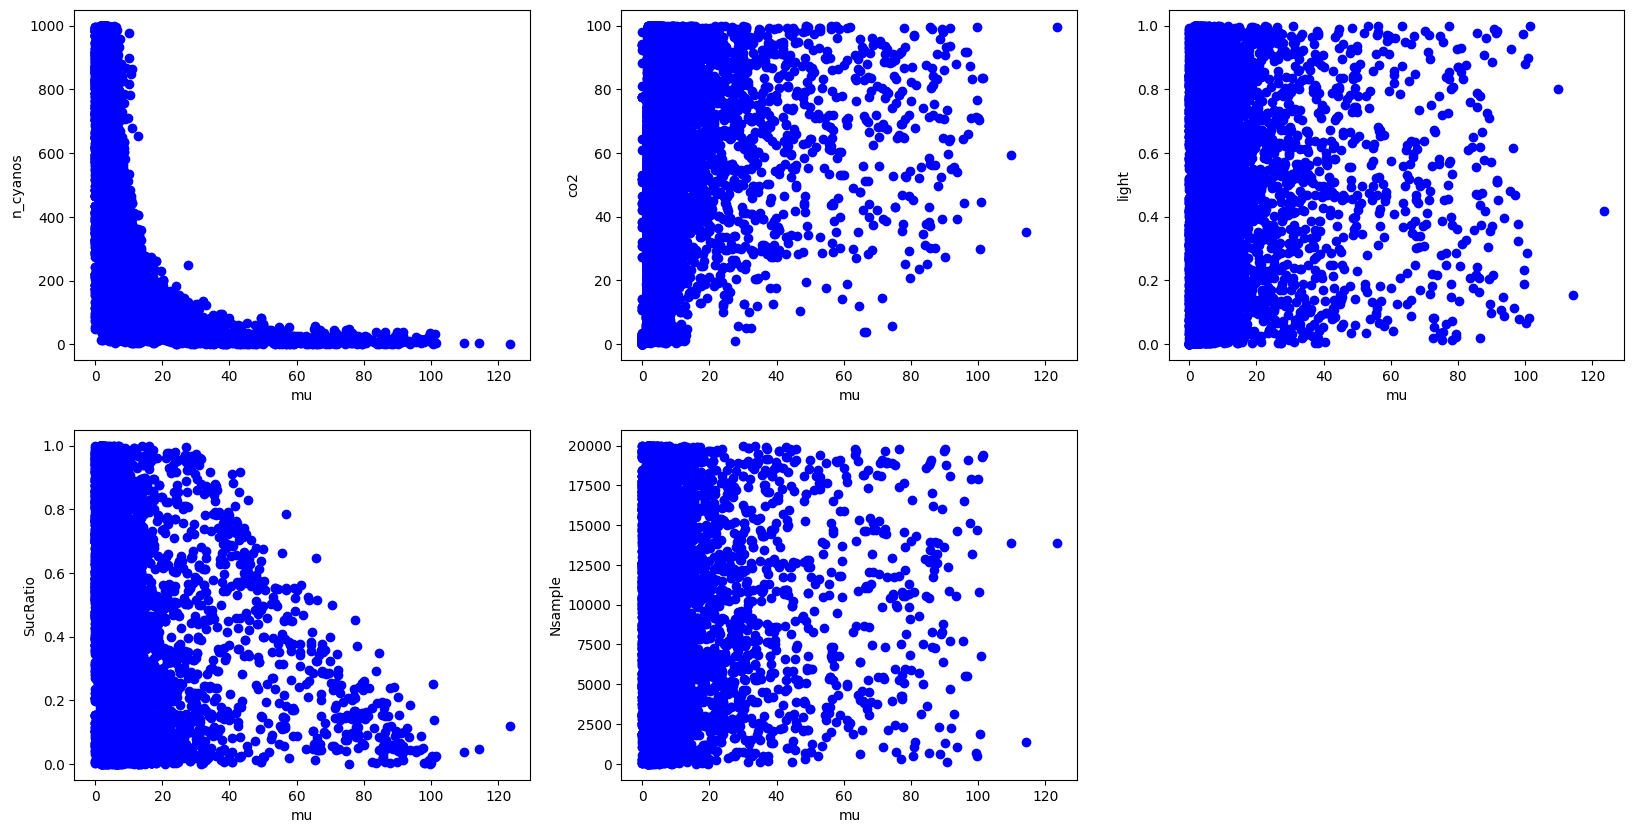

In [70]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
plt.scatter( data_reg_mu.mu,data_reg_mu.n_cyanos,  color='blue')
plt.xlabel("mu")
plt.ylabel("n_cyanos")
plt.subplot(2,3,2)
plt.scatter( data_reg_mu.mu, data_reg_mu.co2, color='blue')
plt.xlabel("mu")
plt.ylabel("co2")
plt.subplot(2,3,3)
plt.scatter( data_reg_mu.mu,data_reg_mu.light,  color='blue')
plt.xlabel("mu")
plt.ylabel("light")
plt.subplot(2,3,4)
plt.scatter( data_reg_mu.mu,data_reg_mu.SucRatio,  color='blue')
plt.xlabel("mu")
plt.ylabel("SucRatio")
plt.subplot(2,3,5)
plt.scatter( data_reg_mu.mu, data_reg_mu.Nsample, color='blue')
plt.xlabel("mu")
plt.ylabel("Nsample")
plt.show()

Since Support Vector Machines (SVM) and (SVR) are sensitive to the scale of features, it is essential to normalize the features before inputting them into the model.

In [71]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_mu_features, data_reg_mu_target, test_size=0.3, random_state=4,shuffle=True)
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))

In [72]:
svr_model_mu = SVR()

Grid search is employed to determine the optimal hyperparameters for the SVR model.

In [ ]:
param_grid = {
    'C': [1.0, 1.5,2.0,2.5,3.0,3.5,4.0], 
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7]
}
# Grid search
grid_search = GridSearchCV(estimator=svr_model_mu, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

data_reg_mu_features_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_mu_features))
data_reg_mu_target_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_mu_target))
grid_search.fit(data_reg_mu_features_scaled, data_reg_mu_target_scaled)
# Best parameters
print("Best parameters:", grid_search.best_params_)

In [73]:
np.random.seed(4)
svr_model_mu = SVR(kernel="rbf", C=4.0, epsilon=0.3,gamma='scale')
svr_model_mu.fit(x_train, y_train)  
predictions = svr_model_mu.predict(x_test) 

svr_mae = mean_absolute_error(y_test,predictions)
svr_r2 = r2_score(y_test,predictions)

print("SVR MAE Score: ",svr_mae)
print("SVR R2 Score : ",svr_r2)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR MAE Score:  0.2230554963684598
SVR R2 Score :  0.7669539988340125


As shown, the SVR model achieved an accuracy of approximately 77% in predicting the 'mu' variable.

---
# Pipeline 2 ('mu') : 
## Predicting Variable 'mu' Using Random Forest Regressor
The Random Forest Regressor is employed to predict the value of variable 'mu' based on the relationships in the data.

In [74]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_mu_features, data_reg_mu_target, test_size=0.3, random_state=4,shuffle=True)

random_forest_regressor_model_mu = RandomForestRegressor() 

Grid search is employed to determine the optimal hyperparameters for the Random forest model.

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Grid search
grid_search = GridSearchCV(estimator=random_forest_regressor_model_mu, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(data_reg_mu_features, data_reg_mu_target)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [75]:
random_forest_regressor_model_mu = RandomForestRegressor(n_estimators=100,max_depth=None,min_samples_leaf=1,min_samples_split=2, random_state=42) 
random_forest_regressor_model_mu.fit(x_train,y_train)
predictions=random_forest_regressor_model_mu.predict(x_test)

msa_randomforest = mean_absolute_error(y_test,predictions)
r2_randomforset=r2_score(y_test,predictions)

print("Random Forest Regressor MAE Score: ",msa_randomforest)
print("Random Forest Regressor R2 Score : ",r2_randomforset)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor MAE Score:  0.34873337359354906
Random Forest Regressor R2 Score :  0.9777345351572152


As shown, the model achieved an accuracy of approximately 98% in predicting the 'mu' variable.

In the next step, feature importances are derived, and the top three most important features are selected to reduce the dataset. A subset of the dataset is then created, which will be used in the pipelines.

In [76]:
# Feature importance
important_features = random_forest_regressor_model_mu.feature_importances_
feature_names = data_reg_mu_features.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': important_features
}).sort_values(by='Importance', ascending=False)
print(importance_df)

    Feature  Importance
0  n_cyanos    0.653758
3  SucRatio    0.186936
1       co2    0.147821
2     light    0.006014
4   Nsample    0.005472


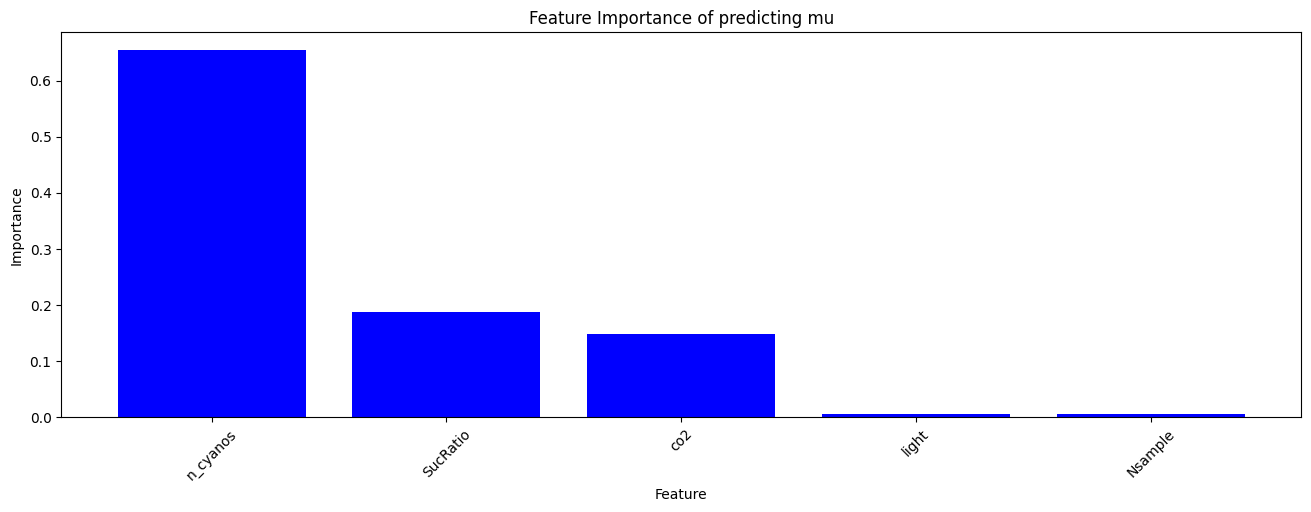

In [77]:
# Plot feature importances
plt.figure(figsize=(16, 5))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.title('Feature Importance of predicting mu')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [78]:
feature_reduced_important=importance_df['Feature'][:3]
data_reg_mu_features_reduced =data_reg[feature_reduced_important]
data_reg_mu_target_reduced=data_reg_mu[['mu']]

## Performing SVR with reduced feature dataset

In [79]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_mu_features_reduced,data_reg_mu_target_reduced, test_size=0.3, random_state=4,shuffle=True)
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))

In [80]:
np.random.seed(4)

svr_model_mu.fit(x_train, y_train)  
predictions = svr_model_mu.predict(x_test)  

svr_mae = mean_absolute_error(y_test,predictions)
svr_r2 = r2_score(y_test,predictions)

print("SVR MAE Score: ",svr_mae)
print("SVR R2 Score : ",svr_r2)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR MAE Score:  0.21935916546862913
SVR R2 Score :  0.8347317925457612


## Performing Random Forest with reduced feature dataset

In [81]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_mu_features_reduced, data_reg_mu_target_reduced, test_size=0.3, random_state=4,shuffle=True)

random_forest_regressor_model_mu.fit(x_train,y_train)
predictions=random_forest_regressor_model_mu.predict(x_test)


mae_randomforest = mean_absolute_error(y_test,predictions)
r2_randomforset=r2_score(y_test,predictions)

print("Random Forest Regressor MAE Score: ",mae_randomforest)
print("Random Forest Regressor R2 Score : ",r2_randomforset)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor MAE Score:  0.33575026330568947
Random Forest Regressor R2 Score :  0.9783884091815946


As shown, it is evident that by reducing and using the most important features, the accuracy of predictions in the SVR model improved significantly, while in the Random Forest model, it remained almost the same.

---
# Pipeline 3 ('mu') :
## Predicting variable 'mu' using K Nearest Neighbour Regressor

For the third pipeline, a K-Nearest Neighbors (KNN) model will be used due to the non-linear relationship between the variables.

Since KNN is sensitive to the scale of features, as it measures distance, the dataset must be normalized before inputting it into the model.

In [82]:

data_reg_mu=data_reg[['n_cyanos','co2','light','SucRatio','Nsample','mu']]
data_reg_mu_features=data_reg_mu[['n_cyanos','co2','light','SucRatio','Nsample']]
data_reg_mu_target=data_reg_mu[['mu']]

x_train, x_test, y_train, y_test = train_test_split(data_reg_mu_features, data_reg_mu_target, test_size=0.3, random_state=4,shuffle=True)
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))


In [83]:
knn_regressor_mu = KNeighborsRegressor()

In [ ]:
param_grid = {
    'n_neighbors': [5,6,7,8,9,10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
# Grid search
grid_search = GridSearchCV(estimator=knn_regressor_mu, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

data_reg_mu_features_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_mu_features))
data_reg_mu_target_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_mu_target))

grid_search.fit(data_reg_mu_features_scaled, data_reg_mu_features_scaled)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [85]:
knn_regressor_mu = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
knn_regressor_mu.fit(x_train, y_train)
knn_prediction_mu = knn_regressor_mu.predict(x_test)

knn_mae= mean_absolute_error(y_test, knn_prediction_mu)
knn_r2 = r2_score(y_test, knn_prediction_mu)

print("KNN MAE Score: ",knn_mae)
print("KNN R2 Score : ",knn_r2)

KNN MAE Score:  0.16363342198773156
KNN R2 Score :  0.686206664225273


The KNN algorithm was trained with the optimal hyperparameters and achieved an accuracy of approximately 69%.

In the next step, the KNN model will be trained on the reduced feature dataset to evaluate its performance.

In [86]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_mu_features_reduced,data_reg_mu_target_reduced, test_size=0.3, random_state=4,shuffle=True)
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))

In [87]:
knn_regressor_mu.fit(x_train, y_train)
knn_prediction_mu_reduced = knn_regressor_mu.predict(x_test)

knn_mae_reduced= mean_absolute_error(y_test, knn_prediction_mu_reduced)
knn_r2_reduced = r2_score(y_test, knn_prediction_mu_reduced)

print("KNN MAE Score: ",knn_mae_reduced)
print("KNN R2 Score : ",knn_r2_reduced)

KNN MAE Score:  0.09531397011891408
KNN R2 Score :  0.8766450993244901


As shown, the accuracy of the model increased significantly, reaching approximately 88%.



---
# Pipeline 4 ('mu') :
## predicting varibale 'mu' using Gradient Boosting

Due to the non-linear relationship, Gradient Boosting is a suitable choice. Additionally, since it is a tree-based method, it is not sensitive to the scale of the features, meaning normalization is not necessary.

In [88]:
data_reg_mu=data_reg[['n_cyanos','co2','light','SucRatio','Nsample','mu']]
data_reg_mu_features=data_reg_mu[['n_cyanos','co2','light','SucRatio','Nsample']]
data_reg_mu_target=data_reg_mu[['mu']]

x_train, x_test, y_train, y_test = train_test_split(data_reg_mu_features, data_reg_mu_target, test_size=0.3, random_state=4,shuffle=True)
gradientboosting_regressor_mu = GradientBoostingRegressor()

In [ ]:
param_grid = {
    'n_estimators': [100,150,200,250,300],
    'learning_rate': [0.1,0.2,0.3,0.4]
}
# Grid search
grid_search = GridSearchCV(estimator=gradientboosting_regressor_mu, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

grid_search.fit(data_reg_mu_features, data_reg_mu_target)

# Best parameters
print("Best parameters:", grid_search.best_params_)

The model will be trained using the optimal hyperparameters identified through grid search.

In [89]:
gradientboosting_regressor_mu = GradientBoostingRegressor(n_estimators=250, learning_rate=0.2,max_depth=1)
gradientboosting_regressor_mu.fit(x_train, y_train)
gradientboosting_prediction_mu =gradientboosting_regressor_mu.predict(x_test)

mae_gradientboosting = mean_absolute_error(y_test, gradientboosting_prediction_mu)
r2_gradientboosting = r2_score(y_test, gradientboosting_prediction_mu)

print("Gradient Boosting Regressor MAE Score: ",mae_gradientboosting)
print("Gradient Boosting Regressor R2 Score : ",r2_gradientboosting)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Regressor MAE Score:  2.397396700077762
Gradient Boosting Regressor R2 Score :  0.7287970971866982


The model achieved an accuracy of 73%. In the next step, the model will be trained on the reduced feature dataset, and its accuracy will be assessed.



In [90]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_mu_features_reduced,data_reg_mu_target_reduced, test_size=0.3, random_state=4,shuffle=True)
gradientboosting_regressor_mu = GradientBoostingRegressor(n_estimators=250, learning_rate=0.2,max_depth=1)
gradientboosting_regressor_mu.fit(x_train, y_train)

gradientboosting_prediction_mu =gradientboosting_regressor_mu.predict(x_test)

mae_gradientboosting = mean_absolute_error(y_test, gradientboosting_prediction_mu)
r2_gradientboosting = r2_score(y_test, gradientboosting_prediction_mu)

print("Gradient Boosting Regressor MAE Score: ",mae_gradientboosting)
print("Gradient Boosting Regressor R2 Score : ",r2_gradientboosting)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Regressor MAE Score:  2.389116670666805
Gradient Boosting Regressor R2 Score :  0.7287022646464774


An assessment of the model's output on the reduced feature dataset reveals that reducing the features did not improve the model's accuracy.

The bar chart below illustrates the performance of four different pipelines in predicting the target variable 'mu' using both the complete dataset and the reduced feature dataset.


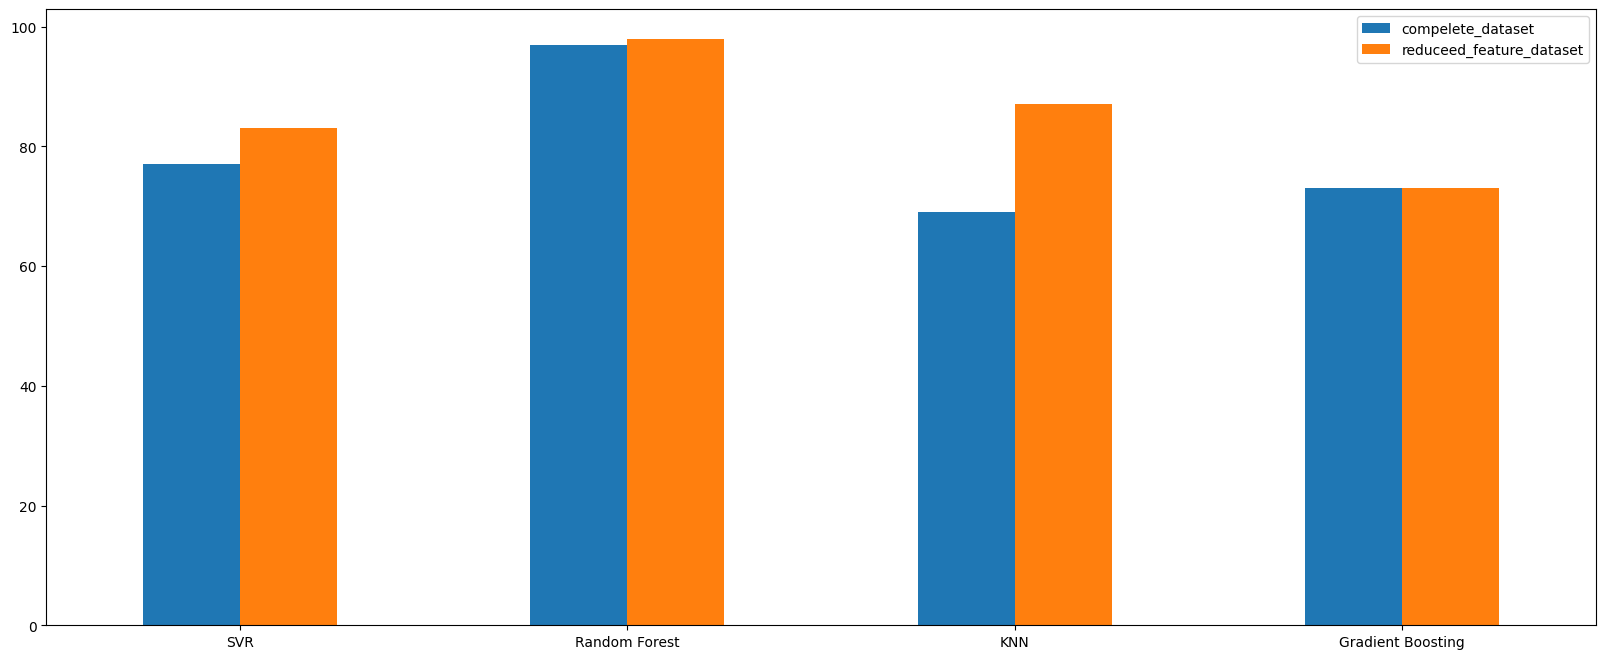

In [91]:
compelete_dataset = [77,97,69,73]
reduceed_feature_dataset = [83,98,87,73]
index = ['SVR', 'Random Forest', 'KNN', 'Gradient Boosting']
df = pd.DataFrame({'compelete_dataset': compelete_dataset,
                   'reduceed_feature_dataset': reduceed_feature_dataset}, index=index)
ax = df.plot.bar(rot=0,figsize=(20, 8))

---
---
# Pipeline 1 ('tau') :
## Predicting variable 'tau' using SVR

As shown in the scatter plots below, the relationship between the predictor variables and the target variable 'tau' is non-linear, making Support Vector Regression (SVR) an appropriate choice for use in the pipeline to predict the 'tau' variable.

In [92]:
data_reg_tau=data_reg[['n_cyanos','co2','light','SucRatio','Nsample','tau']]
data_reg_tau_features=data_reg_tau[['n_cyanos','co2','light','SucRatio','Nsample']]
data_reg_tau_target=data_reg_tau[['tau']]

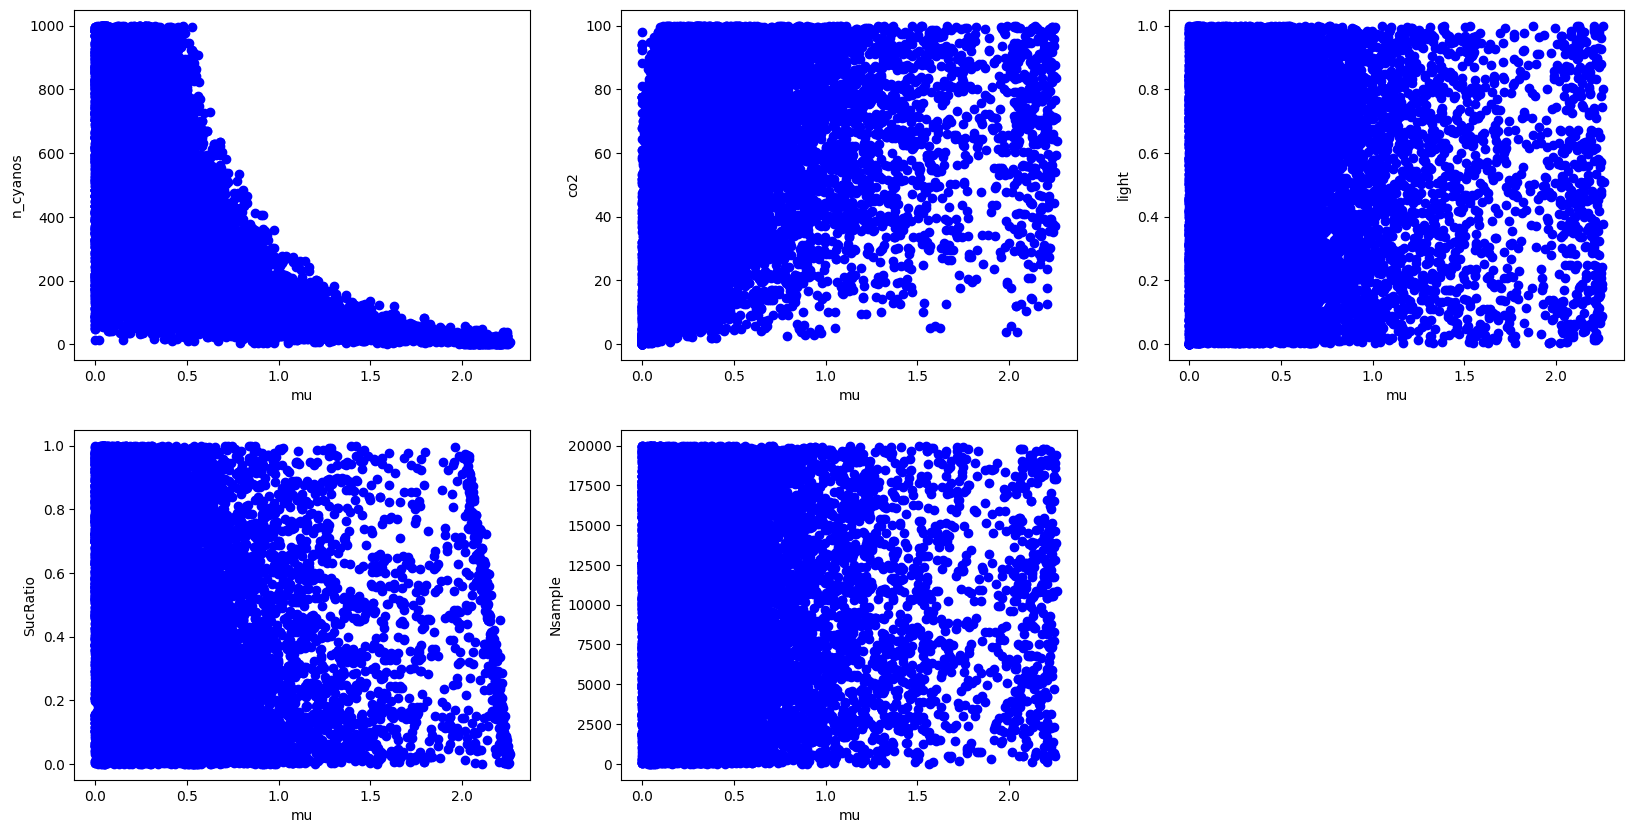

In [93]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
plt.scatter( data_reg_tau.tau,data_reg_tau.n_cyanos,  color='blue')
plt.xlabel("mu")
plt.ylabel("n_cyanos")
plt.subplot(2,3,2)
plt.scatter( data_reg_tau.tau, data_reg_tau.co2, color='blue')
plt.xlabel("mu")
plt.ylabel("co2")
plt.subplot(2,3,3)
plt.scatter( data_reg_tau.tau,data_reg_tau.light,  color='blue')
plt.xlabel("mu")
plt.ylabel("light")
plt.subplot(2,3,4)
plt.scatter( data_reg_tau.tau,data_reg_tau.SucRatio,  color='blue')
plt.xlabel("mu")
plt.ylabel("SucRatio")
plt.subplot(2,3,5)
plt.scatter( data_reg_tau.tau, data_reg_tau.Nsample, color='blue')
plt.xlabel("mu")
plt.ylabel("Nsample")
plt.show()

In [94]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_tau_features, data_reg_tau_target, test_size=0.3, random_state=4,shuffle=True)
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))

In [95]:
svr_model_tau = SVR()

In [ ]:
param_grid = {
    'C': [1.0, 1.5,2.0,2.5,3.0], 
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.3,0.4,0.5]
}
# Grid search
grid_search = GridSearchCV(estimator=svr_model_tau, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

data_reg_tau_features_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_tau_features))
data_reg_tau_target_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_tau_target))
grid_search.fit(data_reg_tau_features_scaled, data_reg_tau_target_scaled)
# Best parameters
print("Best parameters:", grid_search.best_params_)

In [96]:
np.random.seed(4)
svr_model_tau = SVR(kernel="rbf", C=3.0, epsilon=0.2,gamma='auto')
svr_model_tau.fit(x_train, y_train)  
svr_predictions_tau = svr_model_tau.predict(x_test) 

svr_mae = mean_absolute_error(y_test,svr_predictions_tau)
svr_r2 = r2_score(y_test,svr_predictions_tau)

print("SVR MAE Score: ",svr_mae)
print("SVR R2 Score : ",svr_r2)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR MAE Score:  0.13318277620243685
SVR R2 Score :  0.9471897442890266


As shown, the SVR model achieved a high accuracy of 95% in predicting the target variable 'tau'.

---
# Pipeline 2 ('tau') :
## Predicting variable 'tau' using Random Forest Regressor

A Random Forest model will be trained using grid search to find its optimal hyperparameters. Since Random Forest is a tree-based method, normalization of the dataset is not necessary.

In [97]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_tau_features, data_reg_tau_target, test_size=0.3, random_state=4,shuffle=True)

random_forest_regressor_model_tau = RandomForestRegressor() 

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Grid search
grid_search = GridSearchCV(estimator=random_forest_regressor_model_tau, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(data_reg_tau_features, data_reg_tau_target)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [98]:
random_forest_regressor_model_tau = RandomForestRegressor(n_estimators=100,max_depth=None,min_samples_leaf=1,min_samples_split=2, random_state=42) 
random_forest_regressor_model_tau.fit(x_train,y_train)
predictions=random_forest_regressor_model_tau.predict(x_test)

mae_randomforest = mean_absolute_error(y_test,predictions)
r2_randomforset=r2_score(y_test,predictions)

print("Random Forest Regressor MAE Score: ",mae_randomforest)
print("Random Forest Regressor R2 Score : ",r2_randomforset)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor MAE Score:  0.01927362529055412
Random Forest Regressor R2 Score :  0.9921827905251027


As shown, the Random Forest model achieved an accuracy of 99% in predicting the 'tau' variable.

In the next step, feature importances will be derived and used to create a reduced feature dataset, which will be employed in the subsequent pipelines.



In [99]:
# Feature importance
important_features = random_forest_regressor_model_tau.feature_importances_
feature_names = data_reg_tau_features.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': important_features
}).sort_values(by='Importance', ascending=False)
print(importance_df)

    Feature  Importance
0  n_cyanos    0.714495
1       co2    0.201678
3  SucRatio    0.079552
2     light    0.002725
4   Nsample    0.001550


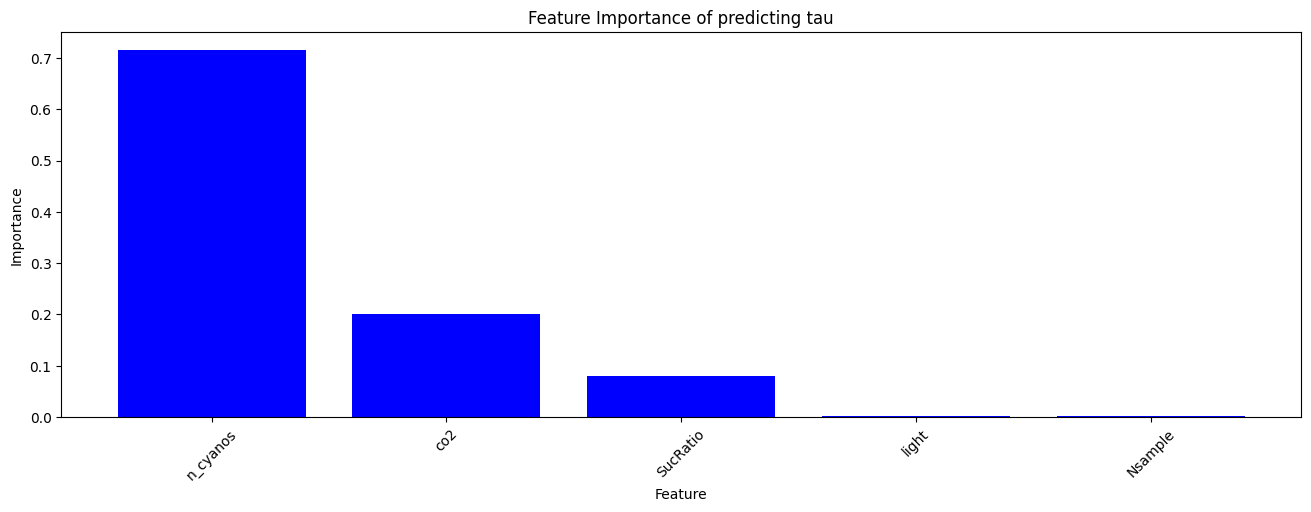

In [100]:
# Plot feature importances
plt.figure(figsize=(16, 5))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.title('Feature Importance of predicting tau')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [101]:
feature_reduced_important=importance_df['Feature'][:3]
data_reg_tau_features_reduced =data_reg[feature_reduced_important]
data_reg_tau_target_reduced=data_reg_tau[['tau']]

In [102]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_tau_features_reduced,data_reg_tau_target_reduced, test_size=0.3, random_state=4,shuffle=True)
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))

In [103]:
np.random.seed(4)
svr_model_tau = SVR(kernel="rbf", C=3.0, epsilon=0.2,gamma='auto')
svr_model_tau.fit(x_train, y_train)  
svr_predictions_tau = svr_model_tau.predict(x_test) 

svr_mae = mean_absolute_error(y_test,svr_predictions_tau)
svr_r2 = r2_score(y_test,svr_predictions_tau)

print("SVR MAE Score: ",svr_mae)
print("SVR R2 Score : ",svr_r2)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR MAE Score:  0.1244164272145248
SVR R2 Score :  0.9622517155700139


In [104]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_tau_features_reduced, data_reg_tau_target_reduced, test_size=0.3, random_state=4,shuffle=True)
random_forest_regressor_model_tau.fit(x_train,y_train)
predictions=random_forest_regressor_model_tau.predict(x_test)

mae_randomforest = mean_absolute_error(y_test,predictions)
r2_randomforset=r2_score(y_test,predictions)

print("Random Forest Regressor MAE Score: ",mae_randomforest)
print("Random Forest Regressor R2 Score : ",r2_randomforset)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor MAE Score:  0.01893120117848527
Random Forest Regressor R2 Score :  0.9922923754185595


As shown, the accuracy of the SVR model improved by nearly 2% with the reduced feature dataset, while the Random Forest model yielded the same accuracy with the reduced feature dataset.

---
# Pipeline 3 ('tau') :
## Predicting variable 'tau' using K Nearest Neighbour Regressor

To use KNN, grid search will be employed to find the optimal hyperparameters. Then, the datasets will be normalized, as this is crucial since KNN relies on distance measurements.

In [105]:
data_reg_tau=data_reg[['n_cyanos','co2','light','SucRatio','Nsample','tau']]
data_reg_tau_features=data_reg_tau[['n_cyanos','co2','light','SucRatio','Nsample']]
data_reg_tau_target=data_reg_tau[['tau']]

x_train, x_test, y_train, y_test = train_test_split(data_reg_tau_features, data_reg_tau_target, test_size=0.3, random_state=4,shuffle=True)
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))


In [106]:
knn_regressor_tau = KNeighborsRegressor()

In [ ]:
param_grid = {
    'n_neighbors': [5,6,7,8,9,10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
# Grid search
grid_search = GridSearchCV(estimator=knn_regressor_tau, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

data_reg_tau_features_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_tau_features))
data_reg_tau_target_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_tau_target))

grid_search.fit(data_reg_tau_features_scaled, data_reg_tau_features_scaled)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [107]:
knn_regressor_tau = KNeighborsRegressor(n_neighbors=10, algorithm='auto')
knn_regressor_tau.fit(x_train, y_train)

knn_prediction_tau = knn_regressor_tau.predict(x_test)

knn_mae= mean_absolute_error(y_test, knn_prediction_tau)
knn_r2 = r2_score(y_test, knn_prediction_tau)

print("KNN MAE Score: ",knn_mae)
print("KNN R2 Score : ",knn_r2)



KNN MAE Score:  0.15204825110433
KNN R2 Score :  0.8692592861869302


The KNN model achieved an accuracy of nearly 87% in prediction. In the next step, the model will be trained on the reduced feature dataset, and its performance will be evaluated.

In [108]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_tau_features_reduced,data_reg_tau_target_reduced, test_size=0.3, random_state=4,shuffle=True)
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))

In [109]:
knn_regressor_tau = KNeighborsRegressor(n_neighbors=10, algorithm='auto')
knn_regressor_tau.fit(x_train, y_train)
knn_prediction_tau = knn_regressor_tau.predict(x_test)

knn_mae= mean_absolute_error(y_test, knn_prediction_tau)
knn_r2 = r2_score(y_test, knn_prediction_tau)
print("KNN MAE Score: ",knn_mae)
print("KNN R2 Score : ",knn_r2)

KNN MAE Score:  0.08547815723074259
KNN R2 Score :  0.9576566372973833


As shown, the accuracy of the KNN model in predicting the 'tau' variable improved to approximately 96% with the reduced feature dataset.


---
# Pipeline 4 ('tau') : 
## Predicting varibale 'tau' using Gradient Boosting

To train the Gradient Boosting model, grid search is used to find the optimal hyperparameter values. Since Gradient Boosting is a tree-based model, normalization is not required.

In [110]:
data_reg_tau=data_reg[['n_cyanos','co2','light','SucRatio','Nsample','tau']]
data_reg_tau_features=data_reg_tau[['n_cyanos','co2','light','SucRatio','Nsample']]
data_reg_tau_target=data_reg_tau[['tau']]

x_train, x_test, y_train, y_test = train_test_split(data_reg_tau_features, data_reg_tau_target, test_size=0.3, random_state=4,shuffle=True)
gradientboosting_regressor_tau = GradientBoostingRegressor()

In [ ]:
param_grid = {
    'n_estimators': [100,150,200,250,300],
    'learning_rate': [0.1,0.2,0.3,0.4]
}
# Grid search
grid_search = GridSearchCV(estimator=gradientboosting_regressor_tau, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

grid_search.fit(data_reg_tau_features, data_reg_tau_target)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [111]:
gradientboosting_regressor_tau = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2,max_depth=1)
gradientboosting_regressor_tau.fit(x_train, y_train)
gradientboosting_prediction_tau =gradientboosting_regressor_tau.predict(x_test)

mae_gradientboosting = mean_absolute_error(y_test, gradientboosting_prediction_tau)
r2_gradientboosting = r2_score(y_test, gradientboosting_prediction_tau)

print("Gradient Boosting Regressor MAE Score: ",mae_gradientboosting)
print("Gradient Boosting Regressor R2 Score : ",r2_gradientboosting)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Regressor MAE Score:  0.08194696175341018
Gradient Boosting Regressor R2 Score :  0.9095588809606994


Now perfrom and evaluate the model on reduced  feature dataset using feature importance of random forest

In [112]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_tau_features_reduced,data_reg_tau_target_reduced, test_size=0.3, random_state=4,shuffle=True)
gradientboosting_regressor_tau = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2,max_depth=1)
gradientboosting_regressor_tau.fit(x_train, y_train)
gradientboosting_prediction_tau =gradientboosting_regressor_tau.predict(x_test)

mae_gradientboosting = mean_absolute_error(y_test, gradientboosting_prediction_tau)
r2_gradientboosting = r2_score(y_test, gradientboosting_prediction_tau)

print("Gradient Boosting Regressor MAE Score: ",mae_gradientboosting)
print("Gradient Boosting Regressor R2 Score : ",r2_gradientboosting)


/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Regressor MAE Score:  0.08176071332734244
Gradient Boosting Regressor R2 Score :  0.908341079728945


An assessment of the model's output on the reduced feature dataset reveals that reducing the features did not improve the model's accuracy.

The bar chart below illustrates the performance of four different pipelines in predicting the target variable 'tau' using both the complete dataset and the reduced feature dataset.


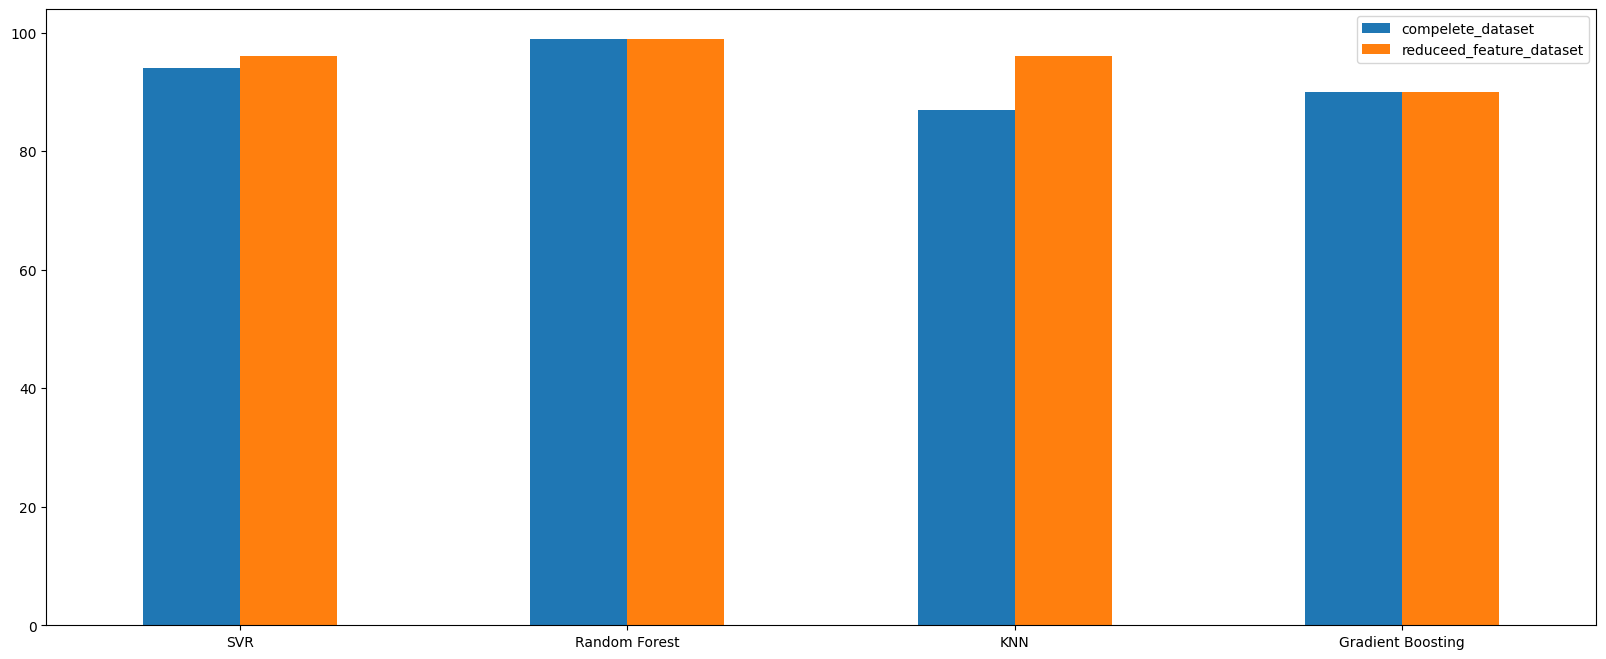

In [113]:
compelete_dataset = [94,99,87,90]
reduceed_feature_dataset = [96,99,96,90]
index = ['SVR', 'Random Forest', 'KNN', 'Gradient Boosting']
df = pd.DataFrame({'compelete_dataset': compelete_dataset,
                   'reduceed_feature_dataset': reduceed_feature_dataset}, index=index)
ax = df.plot.bar(rot=0,figsize=(20, 8))

---
# Pipeline 1 ('a0') :
## Predicting variable 'a0' using SVR

As shown in the scatter plots, the relationship between the predictor variables and the target variable 'a0' is non-linear. Therefore, SVR is chosen for this pipeline to predict the 'a0' variable.

In [114]:
data_reg_a0=data_reg[['n_cyanos','co2','light','SucRatio','Nsample','a0']]
data_reg_a0_features=data_reg_a0[['n_cyanos','co2','light','SucRatio','Nsample']]
data_reg_a0_target=data_reg_a0[['a0']]

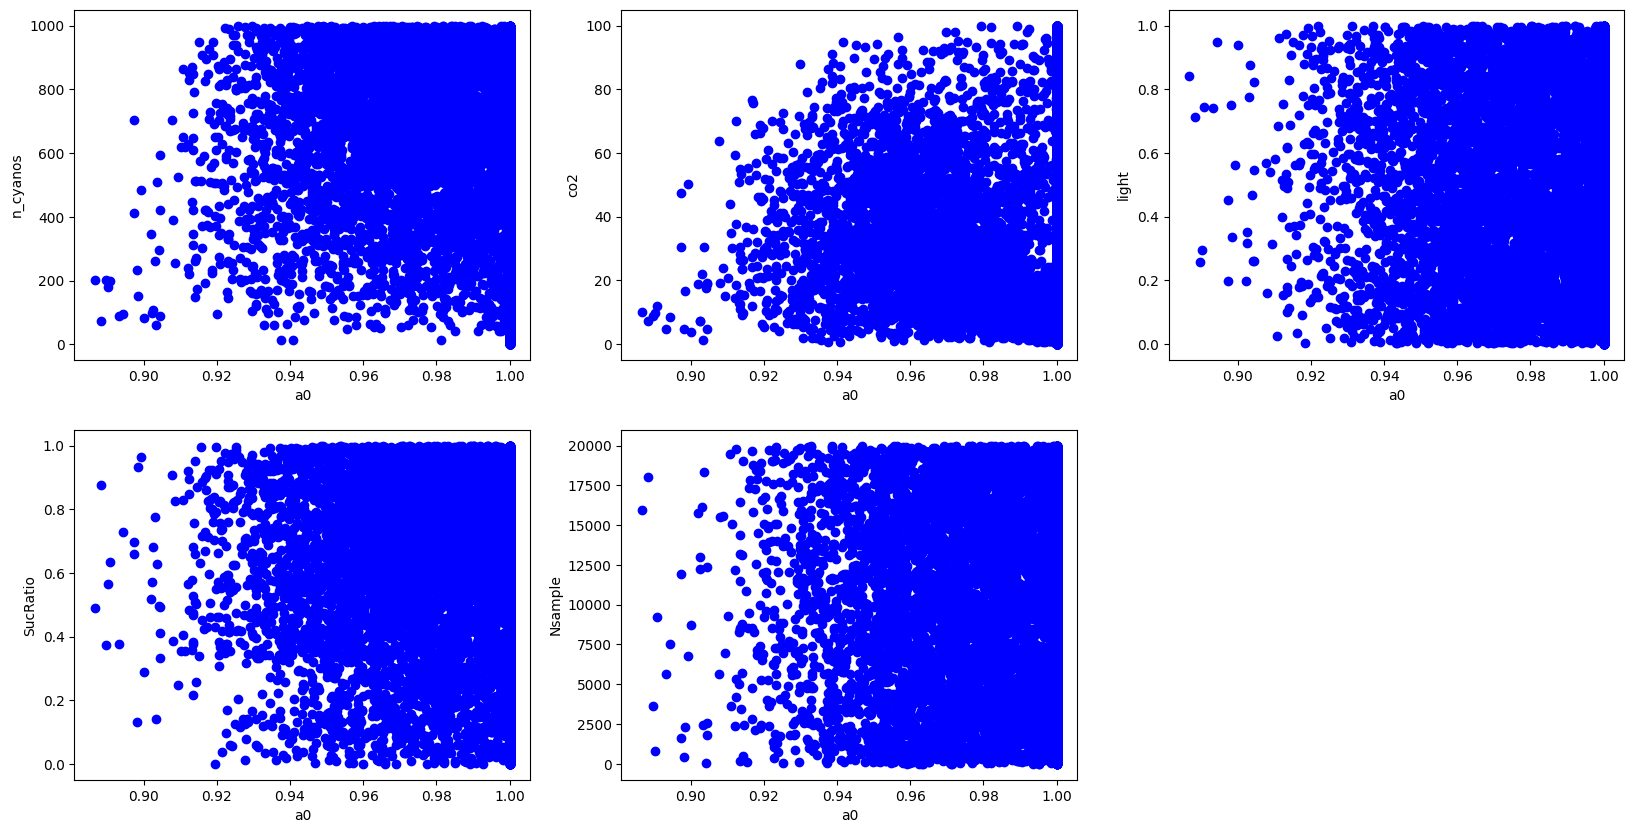

In [115]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
plt.scatter( data_reg_a0.a0,data_reg_a0.n_cyanos,  color='blue')
plt.xlabel("a0")
plt.ylabel("n_cyanos")
plt.subplot(2,3,2)
plt.scatter( data_reg_a0.a0, data_reg_a0.co2, color='blue')
plt.xlabel("a0")
plt.ylabel("co2")
plt.subplot(2,3,3)
plt.scatter( data_reg_a0.a0,data_reg_a0.light,  color='blue')
plt.xlabel("a0")
plt.ylabel("light")
plt.subplot(2,3,4)
plt.scatter( data_reg_a0.a0,data_reg_a0.SucRatio,  color='blue')
plt.xlabel("a0")
plt.ylabel("SucRatio")
plt.subplot(2,3,5)
plt.scatter( data_reg_a0.a0, data_reg_a0.Nsample, color='blue')
plt.xlabel("a0")
plt.ylabel("Nsample")
plt.show()

In [116]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_a0_features, data_reg_a0_target, test_size=0.3, random_state=4,shuffle=True)
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))

In [117]:
svr_model_a0 = SVR()

In [ ]:
param_grid = {
    'C': [1.0, 1.5,2.0,2.5,3.0], 
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.3,0.4,0.5]
}
# Grid search
grid_search = GridSearchCV(estimator=svr_model_a0, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

data_reg_a0_features_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_a0_features))
data_reg_a0_target_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_a0_target))
grid_search.fit(data_reg_a0_features_scaled, data_reg_a0_target_scaled)
# Best parameters
print("Best parameters:", grid_search.best_params_)

In [118]:
np.random.seed(123)
svr_model_a0 = SVR(kernel="rbf", C=3.0, epsilon=0.4,gamma='auto')
svr_model_a0.fit(x_train, y_train)  
svr_predictions_a0 = svr_model_a0.predict(x_test) 

svr_mae = mean_absolute_error(y_test,svr_predictions_a0) 
svr_r2 = r2_score(y_test,svr_predictions_a0)

print("SVR MAE Score: ",svr_mae)
print("SVR R2 Score : ",svr_r2)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR MAE Score:  0.4544448362487326
SVR R2 Score :  0.4952731759227782


As shown, the SVR model achieved an accuracy of approximately 50% in predicting 'a0'.



---
# Pipeline 2 ('a0') : 
## Predicting variable 'a0' using Random Forest Regressor

In [119]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_a0_features, data_reg_a0_target, test_size=0.3, random_state=4,shuffle=True)

random_forest_regressor_model_a0 = RandomForestRegressor() 


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Grid search
grid_search = GridSearchCV(estimator=random_forest_regressor_model_a0, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(data_reg_a0_features, data_reg_a0_target)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [120]:
random_forest_regressor_model_a0 = RandomForestRegressor(n_estimators=200,max_depth=20,min_samples_leaf=2,min_samples_split=5, random_state=42) 
random_forest_regressor_model_a0.fit(x_train,y_train)
predictions=random_forest_regressor_model_a0.predict(x_test)

mae_randomforest = mean_absolute_error(y_test,predictions)
r2_randomforset=r2_score(y_test,predictions)

print("Random Forest Regressor MAE Score: ",mae_randomforest)
print("Random Forest Regressor R2  Score: ",r2_randomforset)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor MAE Score:  0.00407262450721113
Random Forest Regressor R2  Score:  0.7024471553470042


As shown, the accuracy of the Random Forest model is approximately 70%. Next, feature importances will be derived and used to train the pipelines with a reduced feature dataset.

In [121]:
# Feature importance
important_features = random_forest_regressor_model_a0.feature_importances_
feature_names = data_reg_a0_features.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': important_features
}).sort_values(by='Importance', ascending=False)
print(importance_df)

    Feature  Importance
1       co2    0.437945
0  n_cyanos    0.239976
3  SucRatio    0.231623
4   Nsample    0.046421
2     light    0.044036


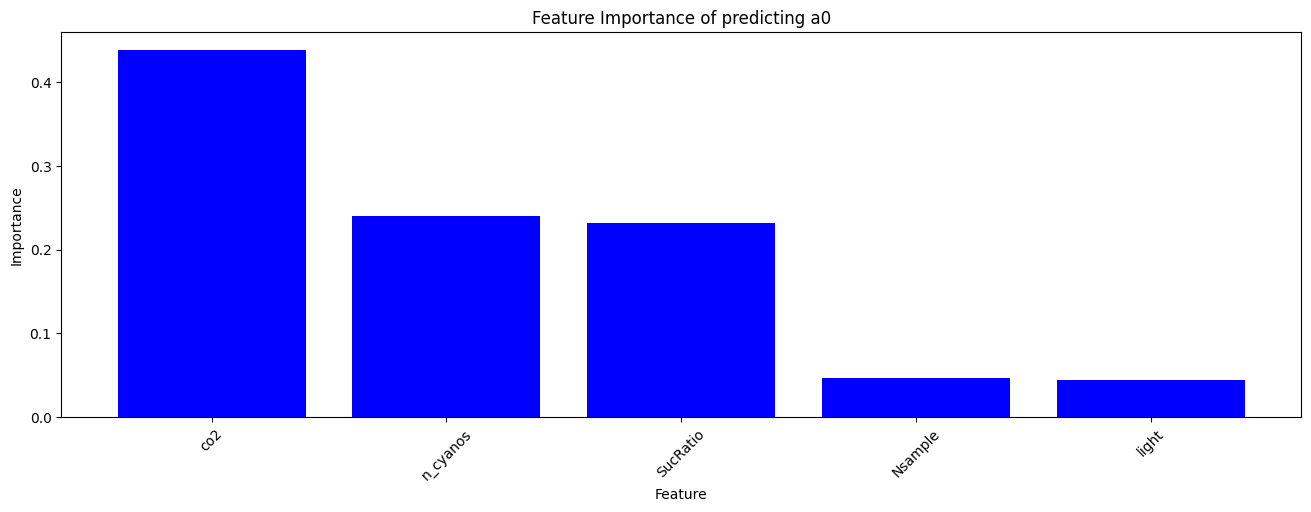

In [122]:
# Plot feature importances
plt.figure(figsize=(16, 5))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.title('Feature Importance of predicting a0')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [123]:
feature_reduced_important=importance_df['Feature'][:3]
data_reg_a0_features_reduced =data_reg[feature_reduced_important]
data_reg_a0_target_reduced=data_reg_a0[['a0']]

In [124]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_a0_features_reduced,data_reg_a0_target_reduced, test_size=0.3, random_state=4,shuffle=True)
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))

In [125]:
np.random.seed(123)
svr_model_a0 = SVR(kernel="rbf", C=3.0, epsilon=0.4,gamma='auto')
svr_model_a0.fit(x_train, y_train)  
svr_predictions_a0 = svr_model_a0.predict(x_test) 

svr_mae = mean_absolute_error(y_test,svr_predictions_a0) 
svr_r2 = r2_score(y_test,svr_predictions_a0)

print("SVR MAE Score: ",svr_mae)
print("SVR R2  Score: ",svr_r2)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR MAE Score:  0.4252956115562488
SVR R2  Score:  0.5570234990691038


In [126]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_a0_features_reduced, data_reg_a0_target_reduced, test_size=0.3, random_state=4,shuffle=True)
random_forest_regressor_model_a0.fit(x_train,y_train)
predictions=random_forest_regressor_model_a0.predict(x_test)

mae_randomforest = mean_absolute_error(y_test,predictions)
r2_randomforset=r2_score(y_test,predictions)

print("Random Forest Regressor MAE Score: ",msa_randomforest)
print("Random Forest Regressor R2  Score: ",r2_randomforset)

/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor MAE Score:  0.34873337359354906
Random Forest Regressor R2  Score:  0.7045661632117297


According to the model outputs, the accuracy of the SVR improved by 5%, while the Random Forest model's accuracy remained unchanged with the reduced feature dataset.

---
# Pipeline 3 ('a0') : 
## Predicting variable 'a0' using K Nearest Neighbour Regressor

To use KNN, grid search will be employed to find the optimal hyperparameters. Then, the datasets will be normalized, as this is crucial since KNN relies on distance measurements.

In [127]:

data_reg_a0=data_reg[['n_cyanos','co2','light','SucRatio','Nsample','a0']]
data_reg_a0_features=data_reg_a0[['n_cyanos','co2','light','SucRatio','Nsample']]
data_reg_a0_target=data_reg_a0[['a0']]

x_train, x_test, y_train, y_test = train_test_split(data_reg_a0_features, data_reg_a0_target, test_size=0.3, random_state=4,shuffle=True)
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))


In [128]:

knn_regressor_a0 = KNeighborsRegressor()

In [ ]:
param_grid = {
    'n_neighbors': [5,6,7,8,9,10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
# Grid search
grid_search = GridSearchCV(estimator=knn_regressor_a0, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

data_reg_a0_features_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_a0_features))
data_reg_a0_target_scaled=standard_scaler.fit_transform(np.asanyarray(data_reg_a0_target))

grid_search.fit(data_reg_a0_features_scaled, data_reg_a0_target_scaled)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [129]:
knn_regressor_a0 = KNeighborsRegressor(n_neighbors=10, algorithm='auto')
knn_regressor_a0.fit(x_train, y_train)
knn_prediction_a0 = knn_regressor_a0.predict(x_test)

knn_mae= mean_absolute_error(y_test, knn_prediction_a0)
knn_r2 = r2_score(y_test, knn_prediction_a0)

print("KNN MAE Score: ",knn_mae)
print("KNN R2  Score: ",knn_r2)

KNN MAE Score:  0.32031267695244514
KNN R2  Score:  0.5683948990952392


Now perfrom and evaluate the model on reduced  feature dataset using feature importance of randomforest

In [130]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_a0_features_reduced,data_reg_a0_target_reduced, test_size=0.3, random_state=4,shuffle=True)
x_train=standard_scaler.fit_transform(np.asanyarray(x_train))
y_train=standard_scaler.fit_transform(np.asanyarray(y_train))
x_test=standard_scaler.fit_transform(np.asanyarray(x_test))
y_test=standard_scaler.fit_transform(np.asanyarray(y_test))

In [131]:
knn_regressor_a0 = KNeighborsRegressor(n_neighbors=10, algorithm='auto')
knn_regressor_a0.fit(x_train, y_train)
knn_prediction_a0 = knn_regressor_a0.predict(x_test)

knn_mae= mean_absolute_error(y_test, knn_prediction_a0)
knn_r2 = r2_score(y_test, knn_prediction_a0)

print("KNN MAE Score: ",knn_mae)
print("KNN R2  Score: ",knn_r2)



KNN MAE Score:  0.2357174907825868
KNN R2  Score:  0.7048575176969993


As shown, the accuracy of the KNN model increased from 56% on the complete dataset to 70% on the reduced feature dataset.

---

# Pipeline 4('a0') :
## Predicting varibale 'a0' using Gradient Boosting

To train the Gradient Boosting model, a grid search is performed to determine the optimal hyperparameter values. Since Gradient Boosting is a tree-based method, the scale of the features does not affect its performance.

In [132]:
data_reg_a0=data_reg[['n_cyanos','co2','light','SucRatio','Nsample','a0']]
data_reg_a0_features=data_reg_a0[['n_cyanos','co2','light','SucRatio','Nsample']]
data_reg_a0_target=data_reg_a0[['a0']]

x_train, x_test, y_train, y_test = train_test_split(data_reg_a0_features, data_reg_a0_target, test_size=0.3, random_state=4,shuffle=True)

gradientboosting_regressor_a0 = GradientBoostingRegressor()

In [ ]:
param_grid = {
    'n_estimators': [100,150,200,250,300],
    'learning_rate': [0.1,0.2,0.3,0.4]
}
# Grid search
grid_search = GridSearchCV(estimator=gradientboosting_regressor_a0, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

grid_search.fit(data_reg_a0_features, data_reg_a0_target)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [133]:
gradientboosting_regressor_a0 = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2,max_depth=1)
gradientboosting_regressor_a0.fit(x_train, y_train)
gradientboosting_prediction_a0 =gradientboosting_regressor_a0.predict(x_test)

mae_gradientboosting = mean_absolute_error(y_test, gradientboosting_prediction_a0)
r2_gradientboosting = r2_score(y_test, gradientboosting_prediction_a0)

print("Gradient Boosting Regressor MAE Score: ",mae_gradientboosting)
print("Gradient Boosting Regressor R2 Score : ",r2_gradientboosting)


/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Regressor MAE Score:  0.010434350549325708
Gradient Boosting Regressor R2 Score :  0.23311237536615415


Now perfrom and evaluate the model on reduced  feature dataset using feature importance of randomforest

In [134]:
x_train, x_test, y_train, y_test = train_test_split(data_reg_a0_features_reduced,data_reg_a0_target_reduced, test_size=0.3, random_state=4,shuffle=True)

gradientboosting_regressor_a0 = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2,max_depth=1)
gradientboosting_regressor_a0.fit(x_train, y_train)
gradientboosting_prediction_a0 =gradientboosting_regressor_a0.predict(x_test)

mae_gradientboosting = mean_absolute_error(y_test, gradientboosting_prediction_a0)
r2_gradientboosting = r2_score(y_test, gradientboosting_prediction_a0)

print("Gradient Boosting Regressor MAE Score: ",mae_gradientboosting)
print("Gradient Boosting Regressor R2 Score : ",r2_gradientboosting)


/Users/ehsanhonarbakhsh/Desktop/Newcastle University Master Playground/Machine Learning/Porject/Code/ml/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Regressor MAE Score:  0.010406298651162244
Gradient Boosting Regressor R2 Score :  0.23611141126516488


An assessment of the model's output on the reduced feature dataset reveals that although reducing the features improved the model's accuracy, the overall acuracy of the gradient boosting is not satisfactory for variable 'a0'

The bar chart below illustrates the performance of four different pipelines in predicting the target variable 'tau' using both the complete dataset and the reduced feature dataset.


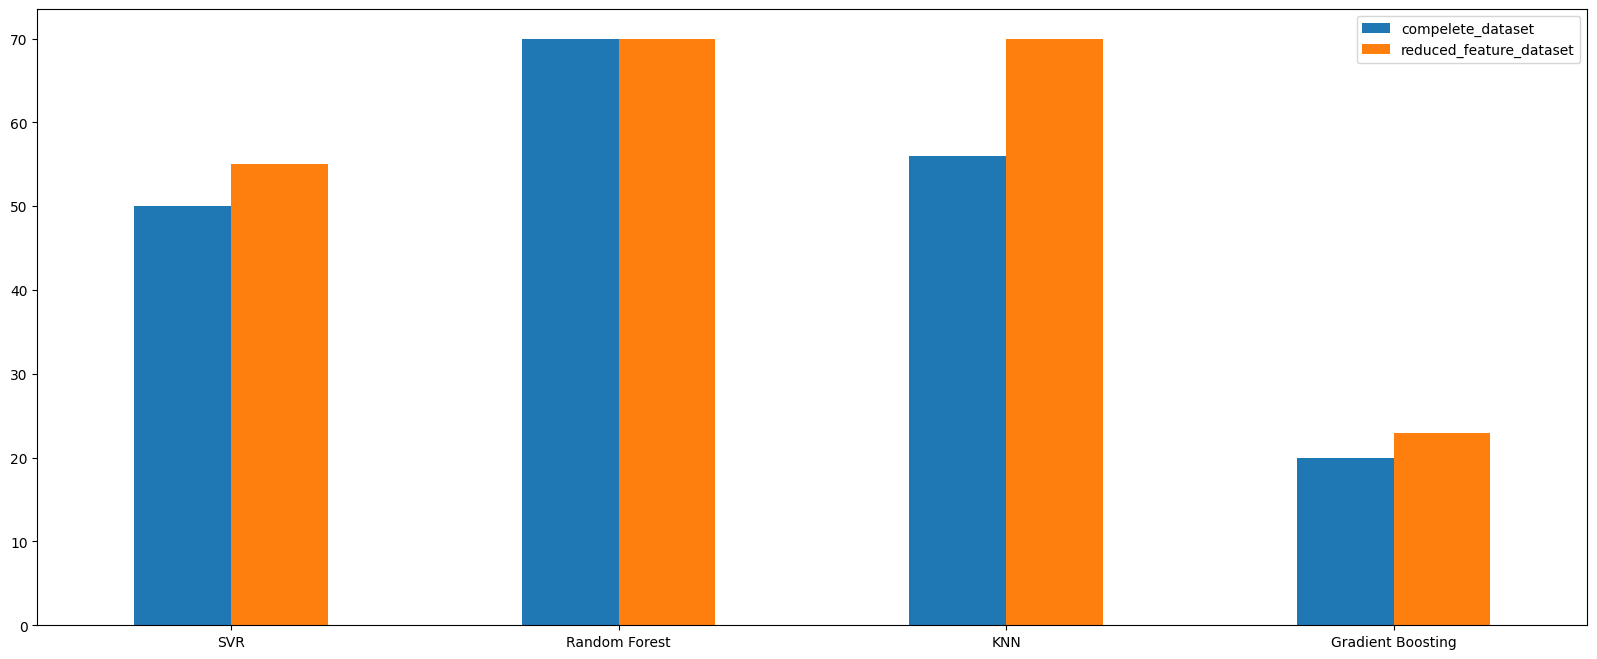

In [135]:
compelete_dataset = [50,70,56,20]
reduceed_feature_dataset = [55,70,70,23]
index = ['SVR', 'Random Forest', 'KNN', 'Gradient Boosting']
df = pd.DataFrame({'compelete_dataset': compelete_dataset,
                   'reduced_feature_dataset': reduceed_feature_dataset}, index=index)
ax = df.plot.bar(rot=0,figsize=(20, 8))

---
# Conclusion:

Based on the outputs from the four different pipelines for each target variable, it can be concluded that the predictor variables 'co2', 'n_cyanos', and 'SucRatio' appear to be critical in predicting the target variables 'a', 'mu', and 'tau'. However, these variables did not have a positive impact on predicting the target variable 'a0'.

---
---
---
# Dataset 3: NLP

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

The third section of the coursework focuses on a natural language processing (NLP) task. In NLP, the goal is to enable machines to understand human language. This is achieved by transforming textual data into mathematical representations that computers can process and perform operations on.

## Data Understanding
Upon examining the news dataset, it is observed that it contains 2,225 distinct news stories (rows) and a single column named 'story'.

In [137]:
data_news=pd.read_csv('news.csv', sep="\t")
print("The shape of the dataset :" ,data_news.shape)
data_news.head()

The shape of the dataset : (2225, 1)


,story
0,Quarterly profits at US media giant TimeWarner...
1,The dollar has hit its highest level against t...
2,The owners of embattled Russian oil giant Yuko...
3,British Airways has blamed high fuel prices fo...
4,Shares in UK drinks and food firm Allied Domec...


## Data Preprocessing
The dataset must first be inspected for any missing values. Subsequently, calculating the length and word count of each news story can provide valuable insights into the dataset's structure and characteristics.



In [138]:
# Checking for missing values
print(data_news.isnull().sum())

story    0
dtype: int64


In [139]:
data_news['text_length']= data_news['story'].apply(len)
data_news['word_count'] = data_news['story'].apply(lambda x: len(x.split()))
data_news.head()

,story,text_length,word_count
0,Quarterly profits at US media giant TimeWarner...,2524,415
1,The dollar has hit its highest level against t...,2218,379
2,The owners of embattled Russian oil giant Yuko...,1516,258
3,British Airways has blamed high fuel prices fo...,2366,400
4,Shares in UK drinks and food firm Allied Domec...,1534,260


A fundamental step in NLP involves converting sentences into mathematical representations that can be processed by machine learning algorithms. However, before this transformation, each news sentence must be broken into smaller units, a process known as tokenization. This step will be performed using the word_tokenize function from the NLTK library.

Tokenization and Dimensionality Reduction
From a mathematical perspective, a large number of tokens can result in high-dimensional vectors, which can increase computational complexity. Therefore, it is essential to reduce the dimensionality of these vectors without compromising the quality of the process or losing critical information and context.

Stop Word Removal
Stop words are commonly used words (e.g., "and," "is," "the") that act as connectors in a sentence but do not contribute significant meaning. Removing these words helps streamline the dataset and reduces dimensionality.

Lemmatization and Stemming
Lemmatization and stemming aim to find the root form of each word and replace the original word with its root. This approach not only simplifies the text but also reduces the dimensions of the feature vectors while retaining essential information.

Case Folding
Converting all uppercase letters to lowercase, normalizes the text and ensures consistency in analysis.

By applying these preprocessing techniques, the dataset can be prepared effectively for further NLP tasks.

In [140]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer,SnowballStemmer

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    return text
data_news['story'] = data_news['story'].apply(preprocess_text)


nltk.download('wordnet')
nltk.download('stopwords')

wordnet_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
snowball_stemmer=SnowballStemmer(language="english",ignore_stopwords=True)

news_tokens_wordnetlemmatizer=[]
news_tokens_porter=[]
news_tokens_snowball=[]

for i in range (0,len(data_news)):
    token=word_tokenize(data_news['story'][i],preserve_line=True)
    token=[wordnet_lemmatizer.lemmatize(word) for word in token]                 
    news_tokens_wordnetlemmatizer.append(token)

for i in range (0,len(data_news)):
    token=word_tokenize(data_news['story'][i],preserve_line=True)
    token=[porter_stemmer.stem(word) for word in token]              
    news_tokens_porter.append(token)

for i in range (0,len(data_news)):
    token=word_tokenize(data_news['story'][i],preserve_line=True)
    token=[snowball_stemmer.stem(word) for word in token]              
    news_tokens_snowball.append(token)    


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ehsanhonarbakhsh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ehsanhonarbakhsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [152]:
print('The WordNetLemmatizer tokens     :',news_tokens_wordnetlemmatizer[1] )
print('The Porter Stemmer tokens        :',news_tokens_wordnetlemmatizer[1] )
print('The The Snow Ball Stemmer tokens :',news_tokens_wordnetlemmatizer[1] )

The WordNetLemmatizer tokens     : ['the', 'dollar', 'ha', 'hit', 'it', 'highest', 'level', 'against', 'the', 'euro', 'in', 'almost', 'three', 'month', 'after', 'the', 'federal', 'reserve', 'head', 'said', 'the', 'u', 'trade', 'deficit', 'is', 'set', 'to', 'stabilise.', 'and', 'alan', 'greenspan', 'highlighted', 'the', 'u', 'government', "'s", 'willingness', 'to', 'curb', 'spending', 'and', 'rising', 'household', 'saving', 'a', 'factor', 'which', 'may', 'help', 'to', 'reduce', 'it.', 'in', 'late', 'trading', 'in', 'new', 'york', ',', 'the', 'dollar', 'reached', '$', '1.2871', 'against', 'the', 'euro', ',', 'from', '$', '1.2974', 'on', 'thursday.', 'market', 'concern', 'about', 'the', 'deficit', 'ha', 'hit', 'the', 'greenback', 'in', 'recent', 'months.', 'on', 'friday', ',', 'federal', 'reserve', 'chairman', 'mr', 'greenspan', "'s", 'speech', 'in', 'london', 'ahead', 'of', 'the', 'meeting', 'of', 'g7', 'finance', 'minister', 'sent', 'the', 'dollar', 'higher', 'after', 'it', 'had', 'earl

---
# Pipeline 1 : Using CountVectorizer
In the first pipeline, each news item in the dataset is converted into a bag of words, which represents the frequency of words within the dataset. This process creates a vocabulary that will be used to vectorize the news sentences. The CountVectorizer examines each news sentence, counts the occurrences of each word from the vocabulary, and stores these counts in a matrix. The output of the CountVectorizer is a matrix where the number of rows corresponds to the number of news items (2225), and the number of columns corresponds to the size of the vocabulary. Each row in the matrix represents a news sentence, and each value indicates the frequency of a specific word from the vocabulary in the corresponding sentence.

The CountVectorizer inherently tokenizes the news sentences and normalizes the text by ignoring stop words, which can be configured through its hyperparameters. Another essential hyperparameter to set is the size of the vocabulary. In this case, the vocabulary was limited to the 100 most frequent words in the dataset (approximately one-third of the mean word count for the entire dataset).

In [141]:
from sklearn.feature_extraction.text import CountVectorizer

data_list=data_news['story']
count_vectorizer = CountVectorizer(max_features=100, stop_words='english')
pipeline1_vectors=count_vectorizer.fit_transform(data_list)
pipeline1_vectors=pipeline1_vectors.toarray()
print('The vocabluary Bank:')
print(count_vectorizer.vocabulary_)
print("The shape of the vectorized dataset : " ,pipeline1_vectors.shape)
print(pipeline1_vectors)


The vocabluary Bank:
{'months': 56, 'year': 98, 'firm': 30, 'sales': 74, 'high': 40, 'said': 73, '10': 1, 'users': 90, 'time': 84, '000': 0, 'company': 16, 'service': 78, 'film': 29, 'chief': 13, '2005': 3, 'growth': 37, 'market': 50, 'set': 80, 'way': 92, 'music': 58, 'government': 35, 'help': 39, 'new': 61, 'mr': 57, 'london': 47, 'expected': 28, 'think': 83, 'european': 27, 'half': 38, 'need': 59, 'tax': 81, 'group': 36, 'says': 76, 'money': 54, 'based': 6, 'director': 21, 'told': 85, 'news': 62, 'british': 11, '2004': 2, 'long': 48, 'good': 34, 'month': 55, 'world': 97, 'uk': 87, 'home': 41, 'including': 42, 'just': 44, 'economy': 23, 'play': 68, 'minister': 52, 'years': 99, 'according': 4, 'added': 5, 'net': 60, 'election': 24, 'record': 71, 'number': 63, 'make': 49, 'like': 46, 'brown': 12, 'use': 88, 'country': 17, 'million': 51, 'companies': 15, 'public': 70, 'say': 75, 'week': 93, 'best': 8, 'people': 66, 'bbc': 7, 'come': 14, 'did': 19, 'day': 18, 'plans': 67, 'technology': 8

Now, instead of a dataset filled with sentences, a dataset filled with numerical representations has been created, which is a suitable format for computers and machine learning algorithms to perform computations.

## Identifying Types of Stories in the Dataset Using K-Means
To determine how many types of news stories exist within the dataset, a clustering method like K-Means can be employed. This is particularly effective since a mathematical representation of the dataset has already been created.

First, the elbow method is used to determine the optimal number of clusters (k) for K-Means clustering. Based on the results, eight clusters appear to be appropriate. Consequently, K-Means is performed to partition the dataset into six clusters, each representing a potential type of news story.

Text(0, 0.5, 'Inertia')

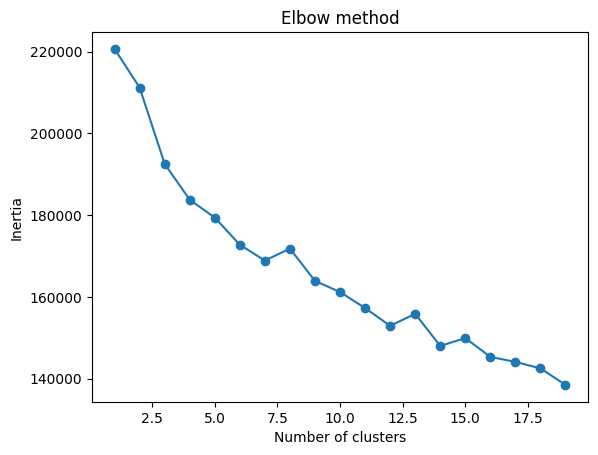

In [142]:
from sklearn.cluster import KMeans 
np.random.seed(3)
inertias = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pipeline1_vectors)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,20), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

A new column, 'Cluster Number', is added to the original dataset, indicating the cluster to which each news item belongs.

In [143]:
num_clusters =8
kmeans = KMeans(n_clusters=num_clusters, random_state=4)
data_news['Cluster_Number'] = kmeans.fit_predict(pipeline1_vectors)
data_news.head()

,story,text_length,word_count,Cluster_Number
0,quarterly profits at us media giant timewarner...,2524,415,4
1,the dollar has hit its highest level against t...,2218,379,7
2,the owners of embattled russian oil giant yuko...,1516,258,7
3,british airways has blamed high fuel prices fo...,2366,400,4
4,shares in uk drinks and food firm allied domec...,1534,260,7


Each news category based on k-means clustering is represented.

In [144]:
for cluster in data_news['Cluster_Number'].unique():
    print(f"Cluster {cluster}:")
    print(data_news[data_news['Cluster_Number'] == cluster]['story'].head())

Cluster 4:
0     quarterly profits at us media giant timewarner...
3     british airways has blamed high fuel prices fo...
6     the us created fewer jobs than expected in jan...
7     india, which attends the g7 meeting of seven l...
12    struggling japanese car maker mitsubishi motor...
Name: story, dtype: object
Cluster 7:
1    the dollar has hit its highest level against t...
2    the owners of embattled russian oil giant yuko...
4    shares in uk drinks and food firm allied domec...
5    japan's economy teetered on the brink of a tec...
8    ethiopia produced 14.27 million tonnes of crop...
Name: story, dtype: object
Cluster 5:
11    indonesia's government has confirmed it is con...
13    the daily and sunday telegraph newspapers are ...
14    air passengers who are unable to board their f...
18    india has raised the limit for foreign direct ...
21    the number of people out of work in europe's l...
Name: story, dtype: object
Cluster 3:
86     former worldcom boss bernie ebber

---

# Pipeline 2 : Using TF-IDF (TfidfVectorizer)
One drawback of bag-of-words models like CountVectorizer (used in pipeline 1) is that they rely solely on word frequency. As a result, they may overlook important tokens that occur very rarely but are critical for representing specific news items.

To address this issue, the TF-IDF (Term Frequency-Inverse Document Frequency) approach provides a more refined method for weighing terms in text. It is an occurrence-based technique for vectorizing text that helps mitigate the limitations of simple frequency-based models.

### Term Frequency (TF):
Similar to CountVectorizer, TF calculates how frequently a term appears in a document. However, it normalizes this frequency by dividing it by the total number of terms in the document. This normalization ensures that longer documents do not disproportionately influence the results.

### Inverse Document Frequency (IDF):
IDF highlights the importance of terms that occur infrequently across the corpus but carry significant meaning for specific documents. Without IDF, terms that appear frequently across all documents would receive more weight, potentially overshadowing less frequent but highly informative terms.

By combining TF and IDF, TF-IDF assigns a balanced weight to each term, ensuring that rare yet meaningful words are appropriately emphasized in the vectorized representation of the text.

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
data_list=data_news['story']
pipeline2_vectorizer = TfidfVectorizer(max_features=100,norm="l2",analyzer='word')
pipeline2_vectors = pipeline2_vectorizer.fit_transform(data_list)

pipeline2_vectors=pipeline2_vectors.toarray()
print('The vocabluary Bank:')
print(pipeline2_vectorizer.vocabulary_)
print("The shape of the vectorized dataset : " ,pipeline2_vectors.shape)
print(pipeline2_vectors)



The vocabluary Bank:
{'at': 10, 'us': 84, 'to': 79, 'for': 25, 'the': 71, 'three': 77, 'from': 26, 'year': 97, 'which': 91, 'is': 38, 'now': 53, 'one': 56, 'of': 54, 'in': 36, 'and': 7, 'said': 63, 'its': 40, 'were': 88, 'by': 19, 'time': 78, 'on': 55, 'that': 70, 'it': 39, 'but': 18, 'had': 30, 'has': 31, '000': 0, 'than': 69, 'before': 15, 'back': 11, 'will': 93, 'up': 83, 'also': 5, 'film': 23, 'when': 90, 'was': 86, 'or': 58, 'all': 4, 'as': 9, 'an': 6, 'into': 37, 'with': 94, 'music': 49, 'against': 3, 'after': 2, 'government': 29, 'new': 50, 'about': 1, 'mr': 48, 'more': 47, 'he': 33, 'some': 67, 'out': 60, 'can': 20, 'this': 76, 'do': 22, 'have': 32, 'made': 44, 'such': 68, 'many': 46, 'could': 21, 'be': 12, 'been': 14, 'are': 8, 'would': 96, 'so': 66, 'who': 92, 'not': 52, 'told': 80, 'if': 35, 'they': 75, 'we': 87, 'them': 73, 'last': 42, 'very': 85, 'world': 95, 'uk': 82, 'other': 59, 'two': 81, 'their': 72, 'just': 41, 'years': 98, 'only': 57, 'his': 34, 'first': 24, 'over':

## Identifying Types of Stories in the Dataset Using DBSCAN

Now that the dataset has been vectorized and a mathematical representation of the data has been created, DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is used to identify how many types of stories are present in the dataset. This method determines the optimal number of clusters, each representing a distinct type of news story.

To determine the optimal values for DBSCAN hyperparameters, epsilon and minimum samples, a grid search is employed.
### Epsilon :  
Specifies the radius of a neighborhood around a data point. If this radius includes enough points, the area is considered dense.
### Minimum Samples: 
Defines the minimum number of data points required within a neighborhood to form a cluster.
By tuning these parameters, DBSCAN can effectively identify clusters in the dataset based on the density of data points.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
param_grid = {
    'eps': [0.2,0.3,0.4,0.5,0.6,0.7],
    'min_samples':[3,4,5,6,7,8]
}
# Grid search
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(pipeline2_vectors)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [148]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'eps': 0.2, 'min_samples': 3}


Based on the grid search results, epsilon is set to 0.2, and minimum samples is set to 3. With these values, DBSCAN is performed to determine the number of clusters present in the dataset.



In [149]:
from sklearn.cluster import DBSCAN
 
epsilon = 0.2
minimumSamples = 3

dbscan = DBSCAN(eps=epsilon, min_samples=minimumSamples)
data_news['cluster_DB'] = dbscan.fit_predict(pipeline2_vectors)

print(f"Unique clusters: {len(set(data_news['cluster_DB'])) - (1 if -1 in data_news['cluster_DB'] else 0)}")


Unique clusters: 2


According to the DBSCAN results, the news stories in the dataset can be categorized into two clusters.

A new column is added to the dataset to represent the DBSCAN cluster labels for each news story. Below, the news sentences categorized by their DBSCAN clusters are displayed.

In [150]:
for cluster in data_news['cluster_DB'].unique():
    print(f"Cluster {cluster}:")
    print(data_news[data_news['cluster_DB'] == cluster]['story'].head())

Cluster -1:
0    quarterly profits at us media giant timewarner...
1    the dollar has hit its highest level against t...
2    the owners of embattled russian oil giant yuko...
3    british airways has blamed high fuel prices fo...
4    shares in uk drinks and food firm allied domec...
Name: story, dtype: object
Cluster 0:
964     talks aimed at averting a series of national s...
1206    talks aimed at averting a series of national s...
1207    talks aimed at averting national strikes over ...
Name: story, dtype: object


---
# Conclusion:
Both pipelines utilized different methods to vectorize the dataset and identify clusters:

Pipeline 1 employed a frequency-based approach (CountVectorizer) to vectorize the dataset, followed by K-Means clustering to determine the number of distinct types of stories.

Pipeline 2 used an occurrence-based method (TF-IDF) to create a mathematical representation of the dataset, which was then fed into DBSCAN to identify the clusters, representing the various types of news stories.
Each pipeline provided unique insights into the dataset, showcasing the versatility of these approaches for text analysis and clustering.